In [1]:
# retina
%config InlineBackend.figure_format = 'retina'

In [7]:
import os
from pathlib import Path
import pickle
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.table import Table
import eazy

from matplotlib import rcParams
plt.rcParams["font.size"] = 15
plt.rcParams["axes.labelsize"] = 20

WD = Path('/data1/hbahk/spherex-photoz/spherex-challenge/challenge')
os.chdir(WD)

from utils import plot_comp_hexbin

In [8]:
# let's see the data structure
hdu = fits.open(WD/'data/fiducial102_reduced.fits')
hdu.info()

Filename: /data1/hbahk/spherex-photoz/spherex-challenge/challenge/data/fiducial102_reduced.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     22   166041R x 6C   [K, D, D, D, D, D]   


In [9]:
cat = Table(hdu[1].data)
print(cat.colnames)
print(len(cat))

['source_id', 'x', 'y', 'HSC_i_MAG', 'z_true', 'FLAG_ML']
166041


In [10]:
cat['HSC_i_MAG'] = cat['HSC_i_MAG'][:,0]
cat['z_true'] = cat['z_true'][:,0]

In [11]:
cat[:5]

source_id,x,y,HSC_i_MAG,z_true,FLAG_ML
int64,float64,float64,float64,float64,float64
180642,0.0,0.0,23.561245805944896,0.7599,0.0
180650,0.0,0.0,22.238483110379896,0.7945,0.0
180651,0.0,0.0,24.799673329369853,0.8346,0.0
180654,0.0,0.0,24.236406897361483,1.3229,0.0
180657,0.0,0.0,24.744050892069353,2.5462,1.0


In [12]:
filters_spherex = eazy.filters.FilterFile('FILTERS+spherex.res')
ids_sphx = filters_spherex.search('SPHEREx')
nums_sphx = ids_sphx + 1

colnames = ['id']
for num in nums_sphx:
    colnames.append(f'F{num}')
    colnames.append(f'E{num}')

cat_synphot = Table.read(WD/'data/L3_COSMOS2020_Richard_2023DEC4_SPHEREx_fiducial102_for_photoz.txt',
                         format='ascii.no_header', names=colnames)
cat_synphot[:5]

  419 SPHEREx_Band1_1 lambda_c= 6.9090e+03 AB-Vega= 0.360 w95=9992.6
  420 SPHEREx_Band1_2 lambda_c= 7.0989e+03 AB-Vega= 0.387 w95=9711.2
  421 SPHEREx_Band1_3 lambda_c= 7.4153e+03 AB-Vega= 0.424 w95=9346.2
  422 SPHEREx_Band1_4 lambda_c= 7.4454e+03 AB-Vega= 0.452 w95=9084.0
  423 SPHEREx_Band1_5 lambda_c= 7.5601e+03 AB-Vega= 0.484 w95=8761.8
  424 SPHEREx_Band1_6 lambda_c= 7.9043e+03 AB-Vega= 0.508 w95=8682.3
  425 SPHEREx_Band1_7 lambda_c= 7.9427e+03 AB-Vega= 0.553 w95=8377.5
  426 SPHEREx_Band1_8 lambda_c= 8.0093e+03 AB-Vega= 0.535 w95=8026.9
  427 SPHEREx_Band1_9 lambda_c= 8.6532e+03 AB-Vega= 0.550 w95=7737.0
  428 SPHEREx_Band1_10 lambda_c= 8.5533e+03 AB-Vega= 0.518 w95=7399.9
  429 SPHEREx_Band1_11 lambda_c= 9.2650e+03 AB-Vega= 0.561 w95=7028.0
  430 SPHEREx_Band1_12 lambda_c= 8.9319e+03 AB-Vega= 0.545 w95=6689.0
  431 SPHEREx_Band1_13 lambda_c= 9.6759e+03 AB-Vega= 0.572 w95=1186.8
  432 SPHEREx_Band1_14 lambda_c= 9.0150e+03 AB-Vega= 0.620 w95=374.5
  433 SPHEREx_Band1_15 lambda_

id,F419,E419,F420,E420,F421,E421,F422,E422,F423,E423,F424,E424,F425,E425,F426,E426,F427,E427,F428,E428,F429,E429,F430,E430,F431,E431,F432,E432,F433,E433,F434,E434,F435,E435,F436,E436,F437,E437,F438,E438,F439,E439,F440,E440,F441,E441,F442,E442,F443,E443,F444,E444,F445,E445,F446,E446,F447,E447,F448,E448,F449,E449,F450,E450,F451,E451,F452,E452,F453,E453,F454,E454,F455,E455,F456,E456,F457,E457,F458,E458,F459,E459,F460,E460,F461,E461,F462,E462,F463,E463,F464,E464,F465,E465,F466,E466,F467,E467,F468,E468,F469,E469,F470,E470,F471,E471,F472,E472,F473,E473,F474,E474,F475,E475,F476,E476,F477,E477,F478,E478,F479,E479,F480,E480,F481,E481,F482,E482,F483,E483,F484,E484,F485,E485,F486,E486,F487,E487,F488,E488,F489,E489,F490,E490,F491,E491,F492,E492,F493,E493,F494,E494,F495,E495,F496,E496,F497,E497,F498,E498,F499,E499,F500,E500,F501,E501,F502,E502,F503,E503,F504,E504,F505,E505,F506,E506,F507,E507,F508,E508,F509,E509,F510,E510,F511,E511,F512,E512,F513,E513,F514,E514,F515,E515,F516,E516,F517,E517,F518,E518,F519,E519,F520,E520
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
180642,-12.93,10.04,4.18,10.46,12.45,10.53,-10.32,11.83,0.6,10.85,-5.49,9.34,2.98,10.72,13.86,9.59,-10.02,10.29,-6.82,10.42,27.23,9.13,-8.28,8.45,-3.51,6.44,2.49,8.21,10.66,8.29,-4.09,9.0,13.52,9.55,34.25,12.5,4.91,5.8,-6.65,6.88,0.72,6.89,4.82,7.01,-0.9,6.57,1.6,5.24,7.11,5.93,1.35,4.65,9.69,5.44,-0.38,6.23,-12.41,5.99,6.43,5.44,-4.11,6.47,-11.08,6.42,2.28,6.19,16.48,11.14,-4.16,6.91,-2.19,6.41,-3.11,10.02,-1.6,7.81,16.47,12.64,8.29,9.36,4.45,9.03,10.84,8.37,-2.91,8.04,7.52,7.34,-4.62,6.25,4.36,7.47,-1.3,7.47,-4.62,7.28,-1.75,7.18,3.17,7.23,1.13,9.37,-6.13,7.6,7.06,8.26,11.44,8.33,13.36,8.02,9.41,8.88,16.02,7.43,0.56,7.71,18.61,8.31,20.02,8.82,10.55,7.34,1.74,6.61,11.86,6.92,0.36,5.69,13.75,5.37,3.66,6.28,9.13,6.88,11.03,7.18,32.55,18.27,0.05,8.07,11.93,14.37,31.63,14.33,-17.03,14.37,13.86,14.41,-23.31,12.61,-2.0,14.43,5.6,11.1,9.79,13.73,1.69,15.94,2.03,16.12,-4.25,15.21,7.88,17.6,-16.08,17.71,6.25,17.38,-47.59,25.32,47.42,23.2,11.77,18.67,34.52,30.58,25.26,25.33,28.14,42.79,-59.15,35.28,60.1,34.4,-26.15,33.87,5.99,35.57,-3.53,32.0,-46.36,28.34,-109.88,35.92,-2.75,34.97,-55.47,39.18,0.74,36.54,-24.96,41.72,-54.64,37.64
180650,11.95,11.1,-17.29,10.8,-9.8,9.43,-5.06,9.01,-2.83,10.11,17.57,10.18,-16.88,10.32,18.33,8.2,-0.08,9.77,3.23,7.9,-0.2,8.22,8.48,8.37,1.34,7.4,7.25,6.74,4.53,7.92,-4.44,8.1,4.6,10.75,3.59,11.03,15

In [13]:
for mag in range(19, 26):
    selection = (cat['HSC_i_MAG'] > mag-1) & (cat['HSC_i_MAG'] < mag) & (cat['FLAG_ML'] == 1.0)
    cat_imag = cat[selection]
    syn_imag = cat_synphot[selection]
    cat_imag.write(WD/f'data/fiducial102_reduced_i{mag:02d}.fits', overwrite=True)
    syn_imag['z_spec'] = cat_imag['z_true']
    syn_imag.write(WD/f'data/synphot_i{mag:02d}.dat',
                   format='ascii.commented_header', overwrite=True)
    print(f'{mag-1} < i < {mag}:', len(cat_imag))

18 < i < 19: 73
19 < i < 20: 228
20 < i < 21: 662
21 < i < 22: 1856
22 < i < 23: 4235
23 < i < 24: 9043
24 < i < 25: 17036


In [14]:
del cat_synphot, cat_imag, syn_imag, cat
import gc
gc.collect()

0

In [23]:
imag = 19
params = {}
params['FILTERS_RES']       = "FILTERS+spherex_reduced.res"
params['TEMPLATES_FILE']    = "BROWN_COSMOS.template"
params['WAVELENGTH_FILE ']  = "../lambda.def" # TODO: check this
params['TEMP_ERR_FILE']     = "../template_error_cosmos2020.txt" # TODO: check this

params['TEMPLATE_COMBOS']   = 1
params['TEMP_ERR_A2']       = 0.0
params['SYS_ERR']           = 0.01

params['MW_EBV']            = 0.012
params['CAT_HAS_EXTCORR']   = True

params['CATALOG_FILE']      = f"data/synphot_i{imag:02d}.dat" 

dir_output = WD/f"output_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['APPLY_PRIOR']       = False
params['PRIOR_FILE']        = "../prior_K_TAO.dat"
params['PRIOR_FILTER']      = 163  # 2MASS Ks band
params['PRIOR_ABZP']        = 23.9
params['PRIOR_FLOOR']       = 0.01

params['FIX_ZSPEC']         = False
params['Z_MIN']             = 0.0
params['Z_MAX']             = 6.0
params['Z_STEP']            = 0.003
params['Z_STEP_TYPE']       = 1

translate_filename = 'spherex.translate'

In [16]:
import gc
gc.collect()

0

In [19]:
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, n_proc=20,
                        timeout=3600)

with open(f'tempfilt_i{imag}.pickle', 'wb') as wfile:
   pickle.dump(ez.tempfilt, wfile, protocol=pickle.HIGHEST_PROTOCOL)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i19.dat
   >>> NOBJ = 73
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F444

Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  ../prior_K_TAO.dat


Template grid: BROWN_COSMOS.template (this may take some time)


100%|██████████| 160/160 [2:21:43<00:00, 53.15s/it]   


Template   0: Arp_118_spec.dat (NZ=1).
Template   1: Arp_256_N_spec.dat (NZ=1).
Template   2: Arp_256_S_spec.dat (NZ=1).
Template   3: CGCG_049-057_spec.dat (NZ=1).
Template   4: CGCG_436-030_spec.dat (NZ=1).
Template   5: CGCG_453-062_spec.dat (NZ=1).
Template   6: Ell1_A_0.sed (NZ=1).
Template   7: Ell2_A_0.sed (NZ=1).
Template   8: Ell3_A_0.sed (NZ=1).
Template   9: Ell4_A_0.sed (NZ=1).
Template  10: Ell5_A_0.sed (NZ=1).
Template  11: Ell6_A_0.sed (NZ=1).
Template  12: Ell7_A_0.sed (NZ=1).
Template  13: Haro_06_spec.dat (NZ=1).
Template  14: IC_0691_spec.dat (NZ=1).
Template  15: IC_0860_spec.dat (NZ=1).
Template  16: IC_0883_spec.dat (NZ=1).
Template  17: IC_4051_spec.dat (NZ=1).
Template  18: IC_4553_spec.dat (NZ=1).
Template  19: IC_5298_spec.dat (NZ=1).
Template  20: III_Zw_035_spec.dat (NZ=1).
Template  21: II_Zw_096_spec.dat (NZ=1).
Template  22: IRAS_08572+3915_spec.dat (NZ=1).
Template  23: IRAS_17208-0014_spec.dat (NZ=1).
Template  24: Mrk_0331_spec.dat (NZ=1).
Template  25

649it [00:00, 7706.04it/s]


In [23]:
ez.OBJID[:5]

237145
238144
549582
551692
558758


In [ ]:
ez.fit_catalog(ez.idx, n_proc=1)

ez.show_fit(id=237145, savefig='fit.png')

In [29]:
ez.tempfilt.NOBJ

0

In [26]:
tempfilt_rerun = ez.tempfilt.tempfilt
with open('tempfilt.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
    
tempfilt.tempfilt - tempfilt_rerun

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

they are exactly the same

## TEMPLATE_COMBOS test

In [24]:
params['TEMPLATE_COMBOS']   = 1

with open('tempfilt0001.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i19.dat
   >>> NOBJ = 73
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F444

Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  ../prior_K_TAO.dat


649it [00:00, 7791.89it/s]
100%|██████████| 649/649 [01:10<00:00,  9.16it/s]


Compute best fits
fit_best: 0.3 s (n_proc=1,  NOBJ=73)
Fit 71.6 s (n_proc=1, NOBJ=73)


Objects : 73
Outliers: 0




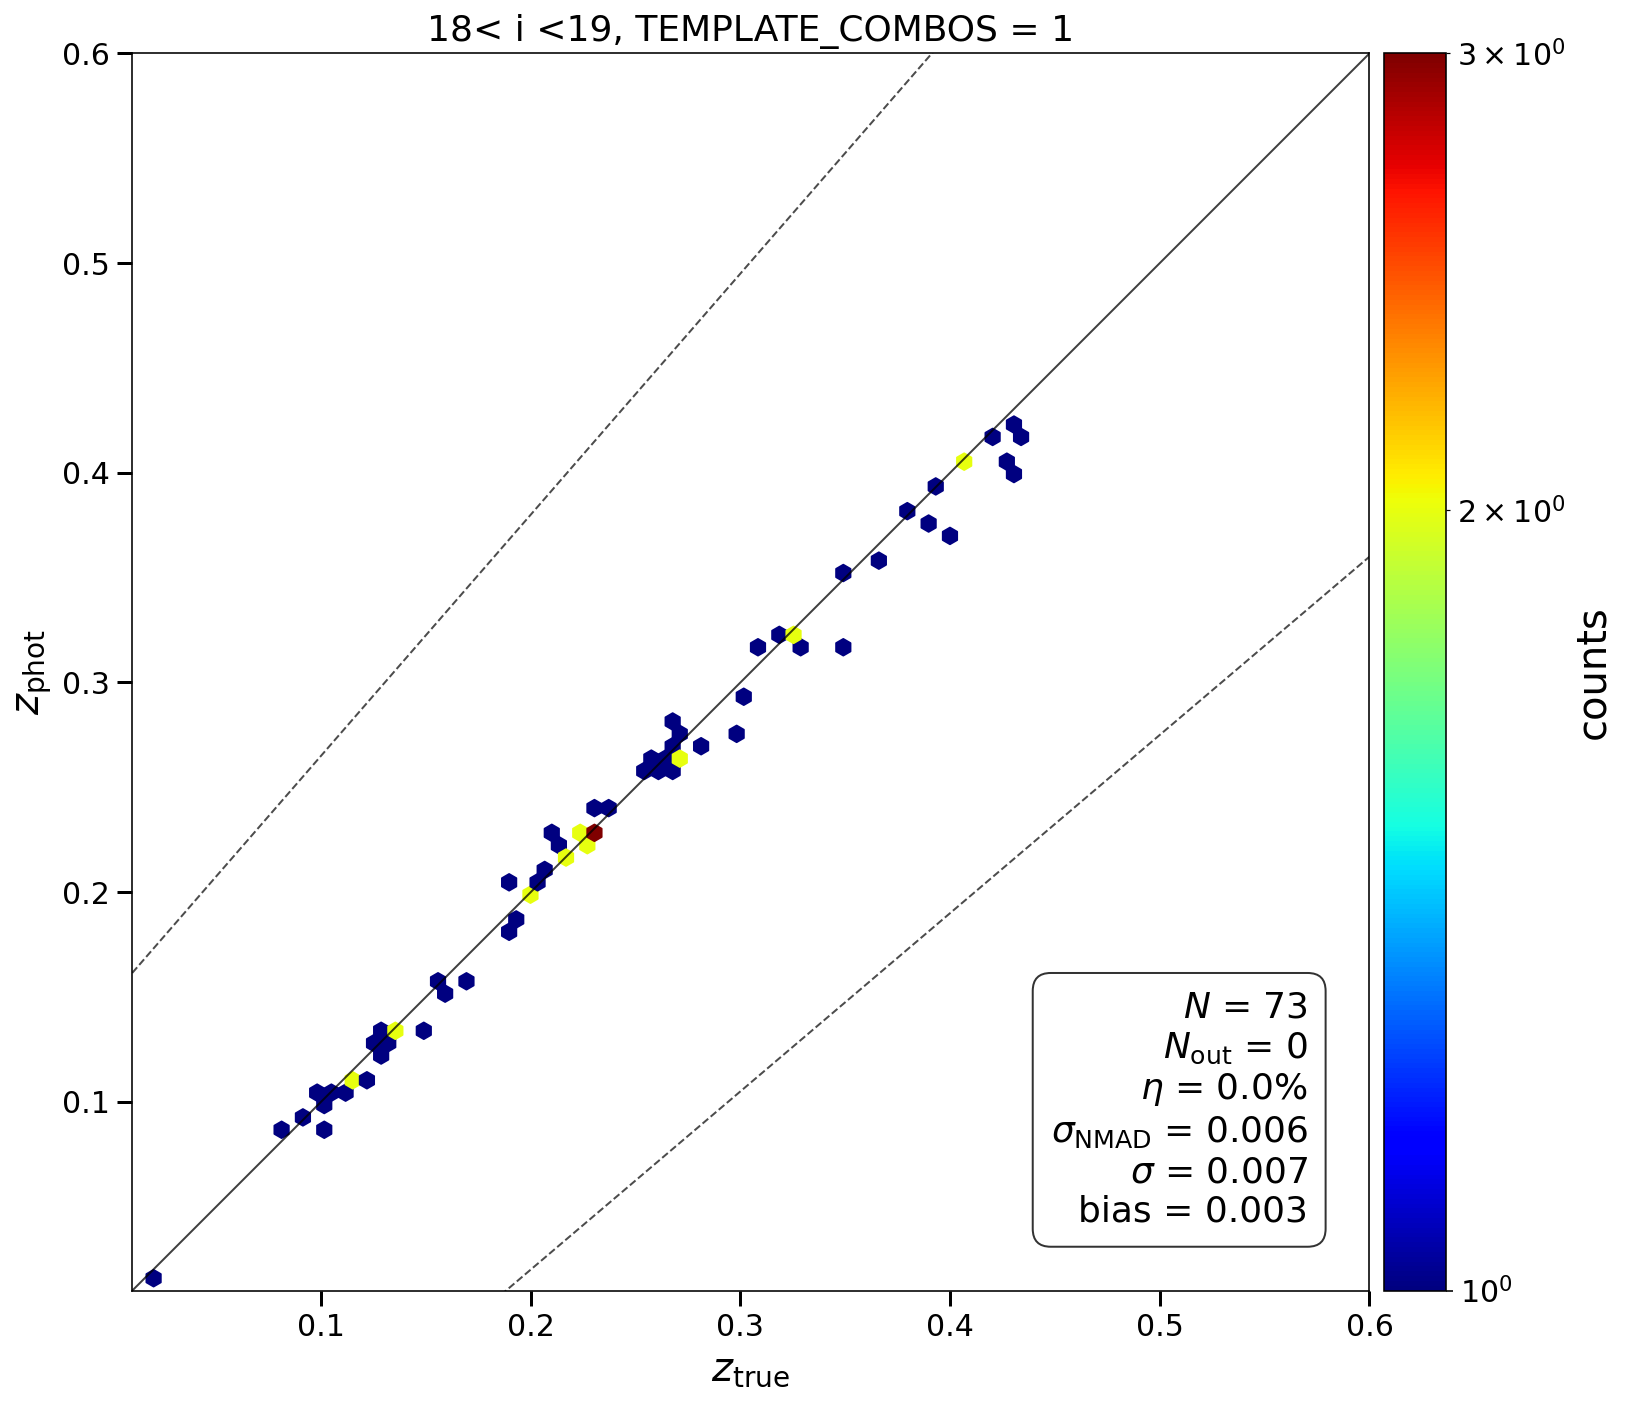

In [25]:
from utils import plot_comp_hexbin
cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d}, TEMPLATE_COMBOS = 1", xmin=0.01, xmax=0.6, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

In [26]:
params['TEMPLATE_COMBOS']   = 'a'

with open('tempfilt0001.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, verbose=False)
ez.fit_catalog(ez.idx, n_proc=1)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i19.dat
   >>> NOBJ = 73
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F444

Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  ../prior_K_TAO.dat


649it [00:00, 8218.74it/s]
  2%|▏         | 10/649 [00:00<00:06, 91.50it/s]

100%|██████████| 649/649 [01:18<00:00,  8.22it/s]


Compute best fits
fit_best: 0.2 s (n_proc=1,  NOBJ=73)
Fit 80.1 s (n_proc=1, NOBJ=73)


Objects : 73
Outliers: 0




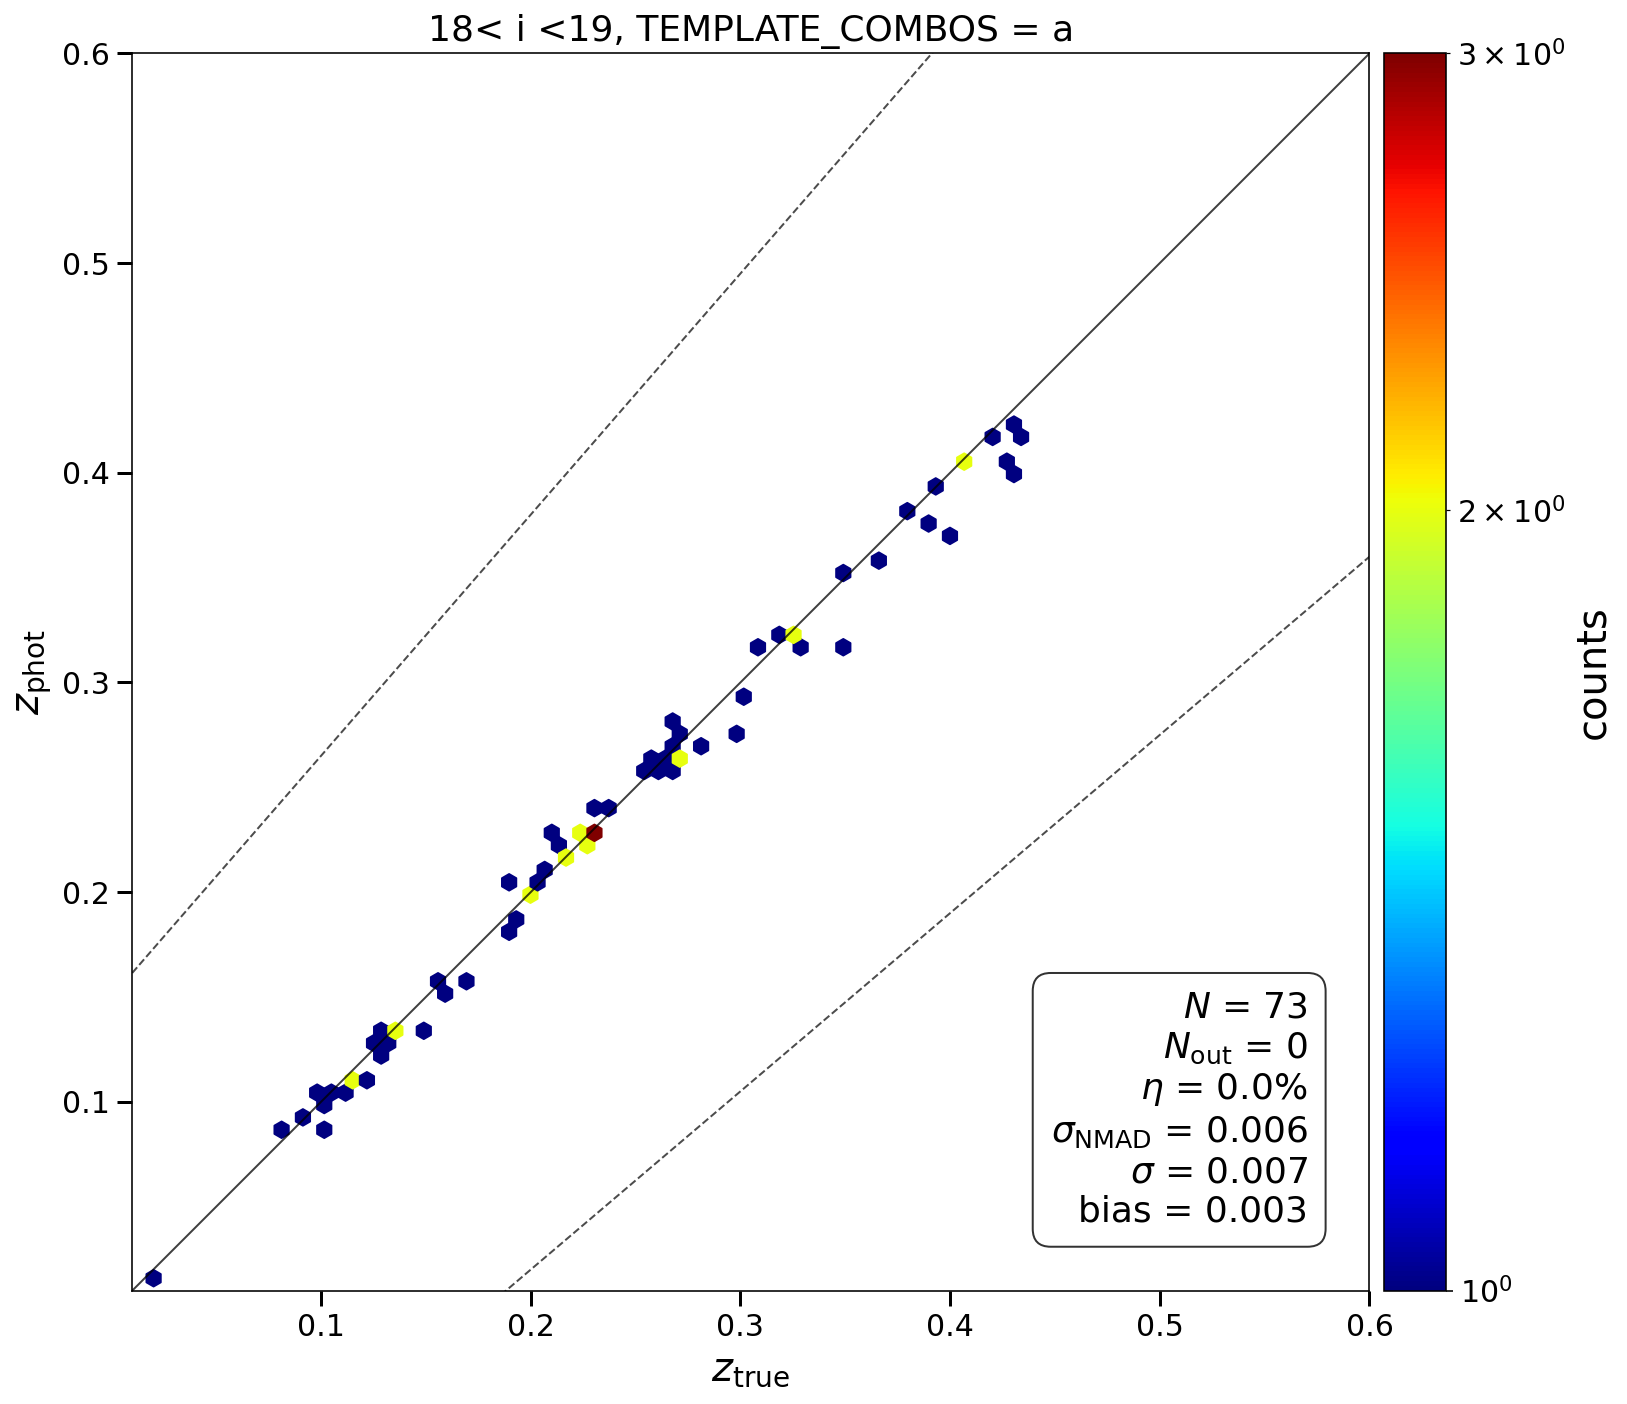

In [27]:
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d}, TEMPLATE_COMBOS = a", xmin=0.01, xmax=0.6, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

In [28]:
imag = 20
params['CATALOG_FILE']      = f"data/synphot_i{imag:02d}.dat" 

dir_output = WD/f"output_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['TEMPLATE_COMBOS']   = 1

with open('tempfilt0001.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i20.dat
   >>> NOBJ = 228
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F44

649it [00:00, 3345.68it/s]
  1%|          | 6/649 [00:00<00:21, 29.53it/s]

100%|██████████| 649/649 [03:20<00:00,  3.24it/s]


Compute best fits
fit_best: 0.9 s (n_proc=1,  NOBJ=228)
Fit 201.8 s (n_proc=1, NOBJ=228)


Objects : 228
Outliers: 0




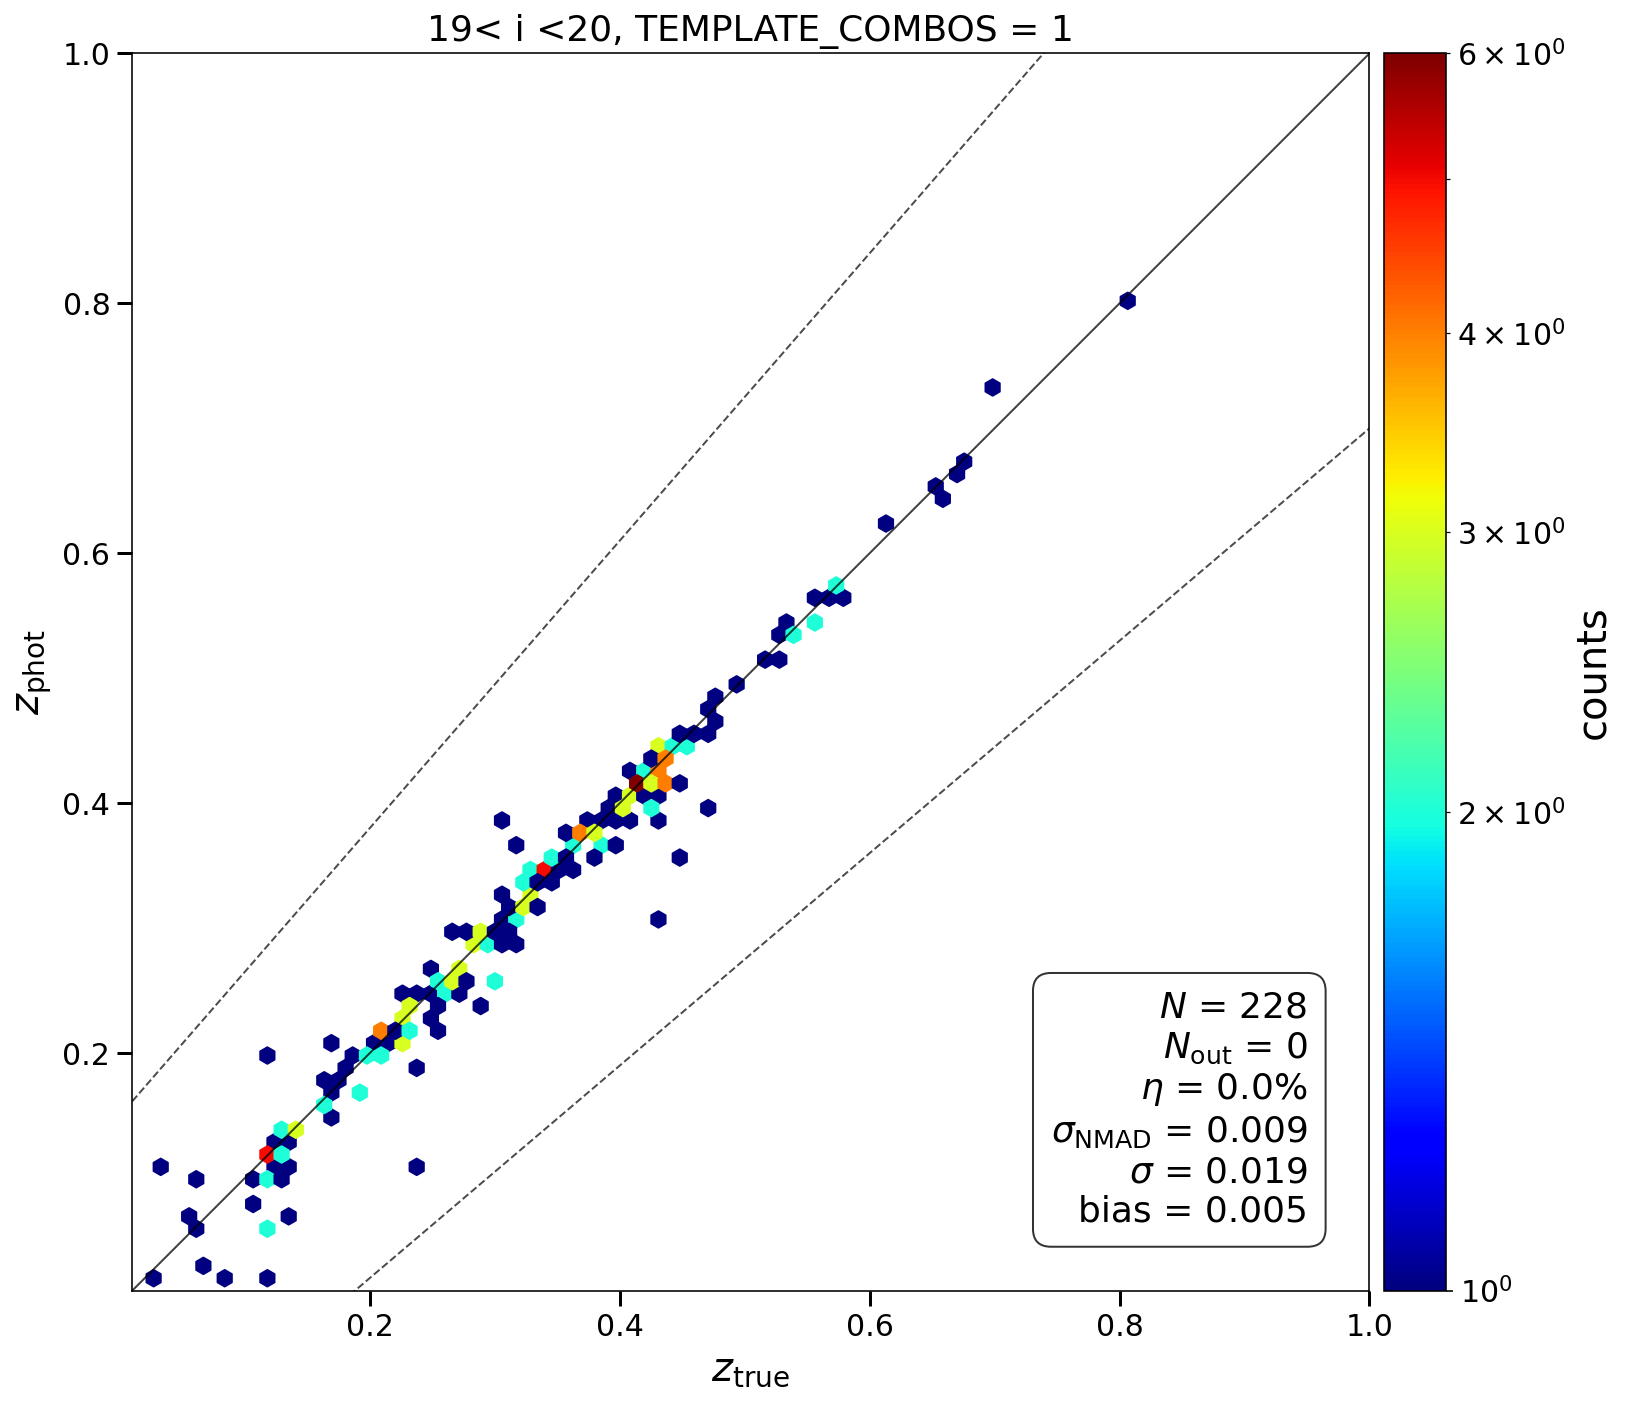

In [30]:
cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d}, TEMPLATE_COMBOS = 1",
                          xmin=0.01, xmax=1, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

In [48]:
params['TEMPLATE_COMBOS']   = 'a'

with open('tempfilt.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i20.dat
   >>> NOBJ = 228
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F44

649it [00:00, 2994.34it/s]
100%|██████████| 649/649 [03:49<00:00,  2.82it/s]


Compute best fits
fit_best: 0.9 s (n_proc=1,  NOBJ=227)
Fit 231.6 s (n_proc=1, NOBJ=228)


Objects : 227
Outliers: 0




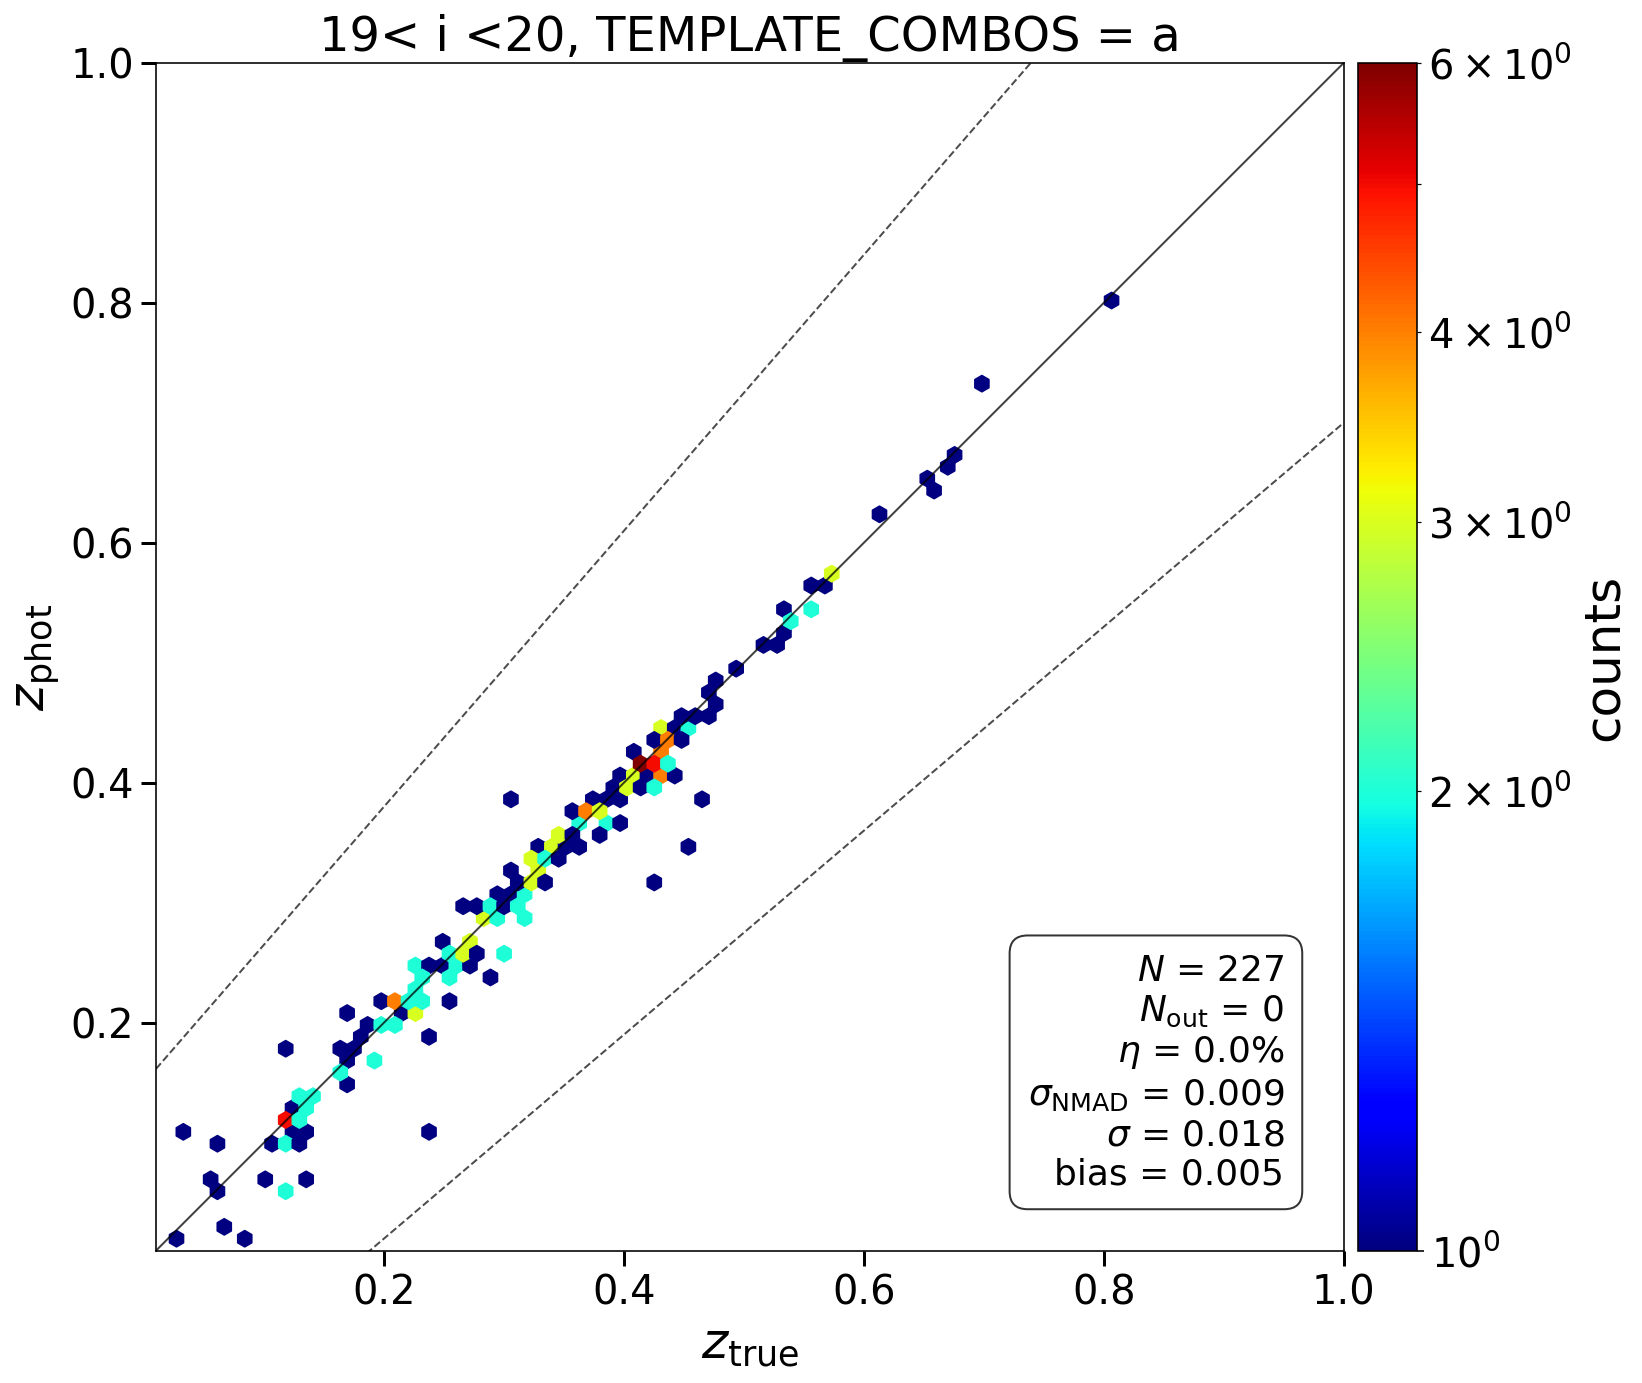

In [49]:
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d}, TEMPLATE_COMBOS = a",
                          xmin=0.01, xmax=1, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i22.dat
   >>> NOBJ = 1856
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F4

649it [00:01, 446.56it/s]
100%|██████████| 649/649 [33:44<00:00,  3.12s/it]


Compute best fits
fit_best: 7.4 s (n_proc=1,  NOBJ=1849)
Fit 2032.7 s (n_proc=1, NOBJ=1856)
Objects : 1849
Outliers: 440


Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i22.dat
   >>> NOBJ = 1856
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (

649it [00:01, 420.57it/s]
100%|██████████| 649/649 [45:47<00:00,  4.23s/it]


Compute best fits
fit_best: 8.2 s (n_proc=1,  NOBJ=1849)
Fit 2756.7 s (n_proc=1, NOBJ=1856)
Objects : 1849
Outliers: 440




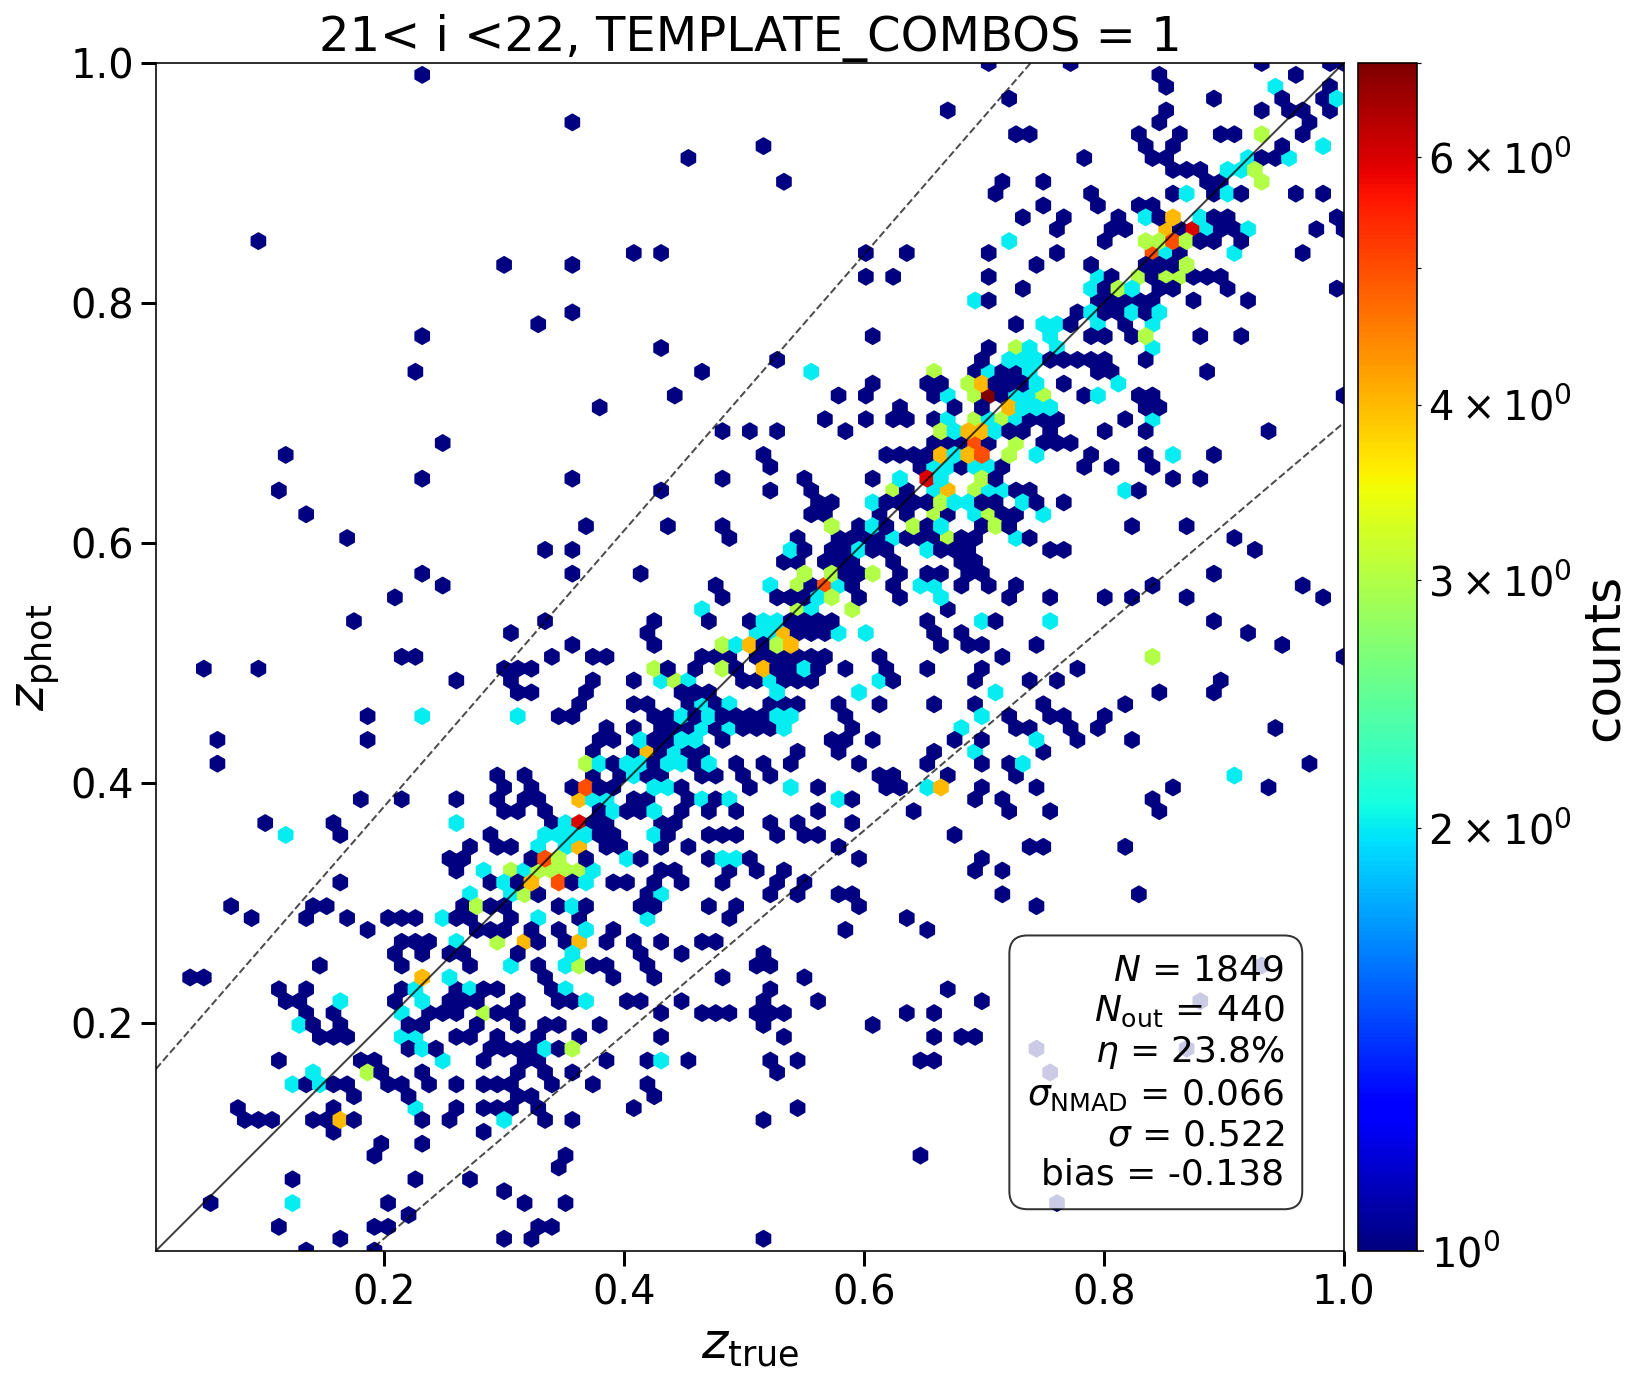

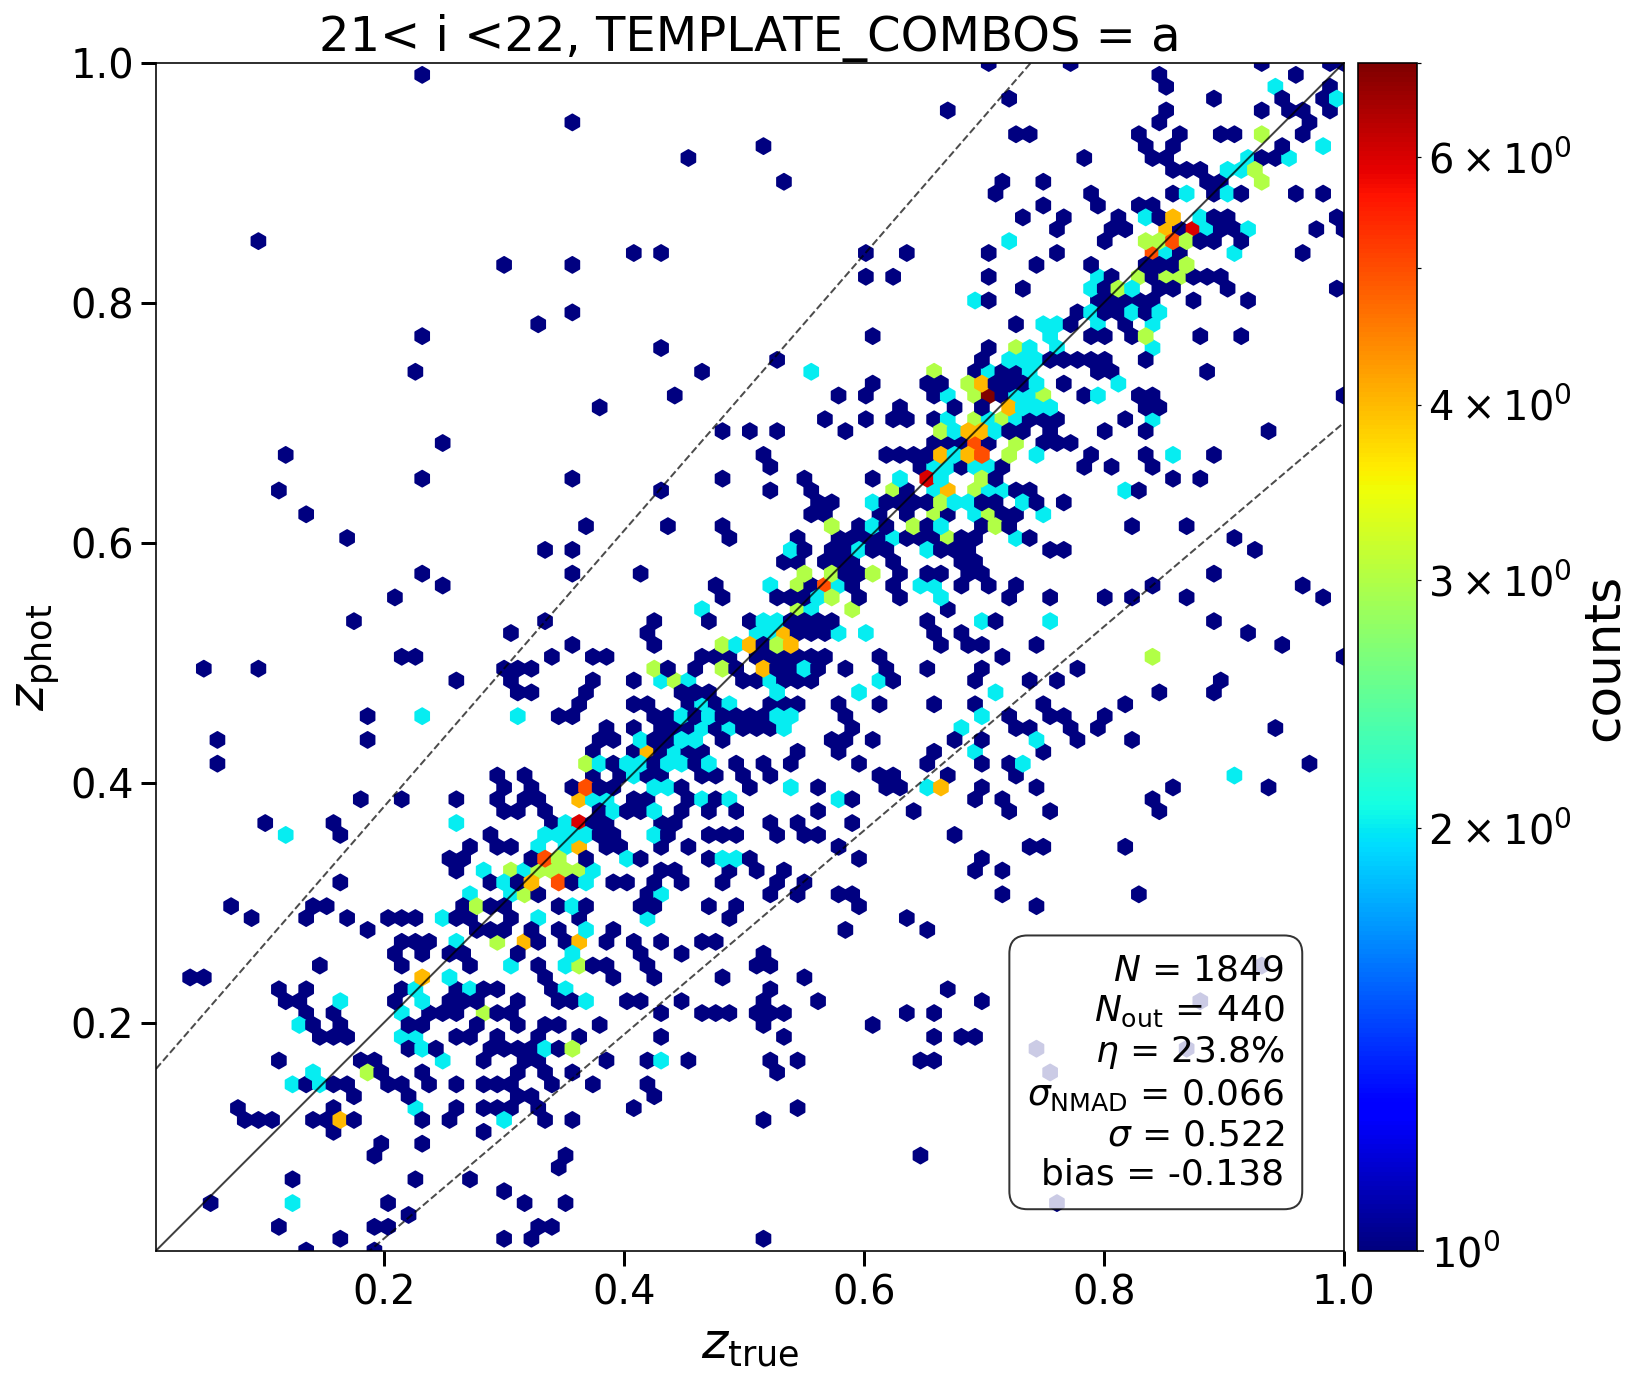

In [50]:
imag = 22
params['CATALOG_FILE']      = f"data/synphot_i{imag:02d}.dat" 

dir_output = WD/f"output_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['TEMPLATE_COMBOS']   = 1

with open('tempfilt.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)

cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d}, TEMPLATE_COMBOS = 1",
                          xmin=0.01, xmax=1, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)


params['TEMPLATE_COMBOS']   = 'a'

with open('tempfilt.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)

id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d}, TEMPLATE_COMBOS = a",
                          xmin=0.01, xmax=1, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

Objects : 1849
Outliers: 440




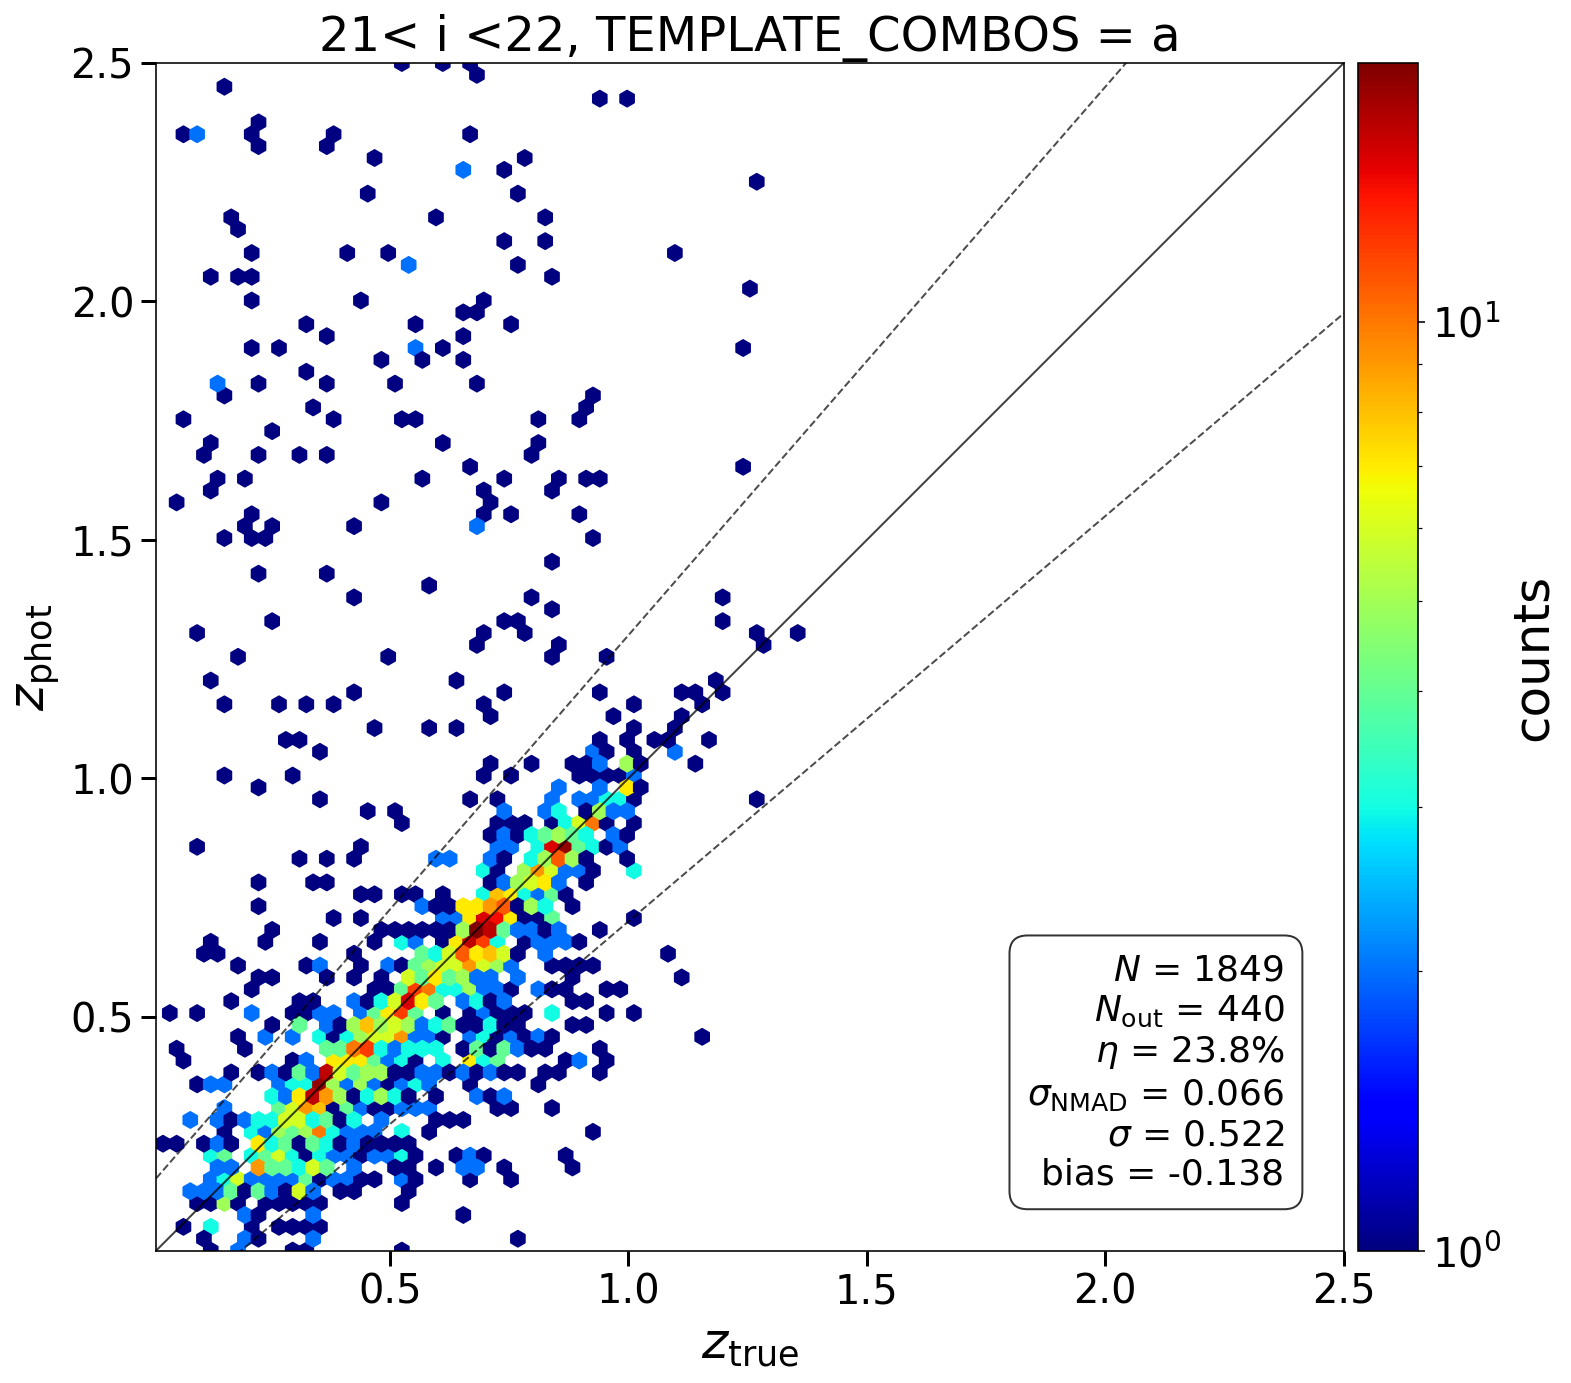

In [51]:
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d}, TEMPLATE_COMBOS = a",
                          xmin=0.01, xmax=2.5, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

# Discrete Feature Inspection

In [ ]:
objids = ez.OBJID[ez.zbest>1.5]
for objid in objids:
    fig, data = ez.show_fit(id=objid, xlim=[0.5, 5.1], figsize=(12, 5))
    fig.savefig(dir_outfig/f'fit_{objid}.png', dpi=300)

In [32]:
imag = 20
params['CATALOG_FILE']      = f"data/synphot_i{imag:02d}.dat" 

dir_output = WD/f"output_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['TEMPLATE_COMBOS']   = 1

with open('tempfilt0001.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(id=272471, n_proc=1)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i20.dat
   >>> NOBJ = 228
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F44

Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  ../prior_K_TAO.dat


649it [00:00, 3145.71it/s]
  2%|▏         | 12/649 [00:02<03:22,  3.14it/s]

100%|██████████| 649/649 [03:30<00:00,  3.09it/s]


Compute best fits
fit_best: 0.7 s (n_proc=1,  NOBJ=228)
Fit 211.7 s (n_proc=1, NOBJ=228)


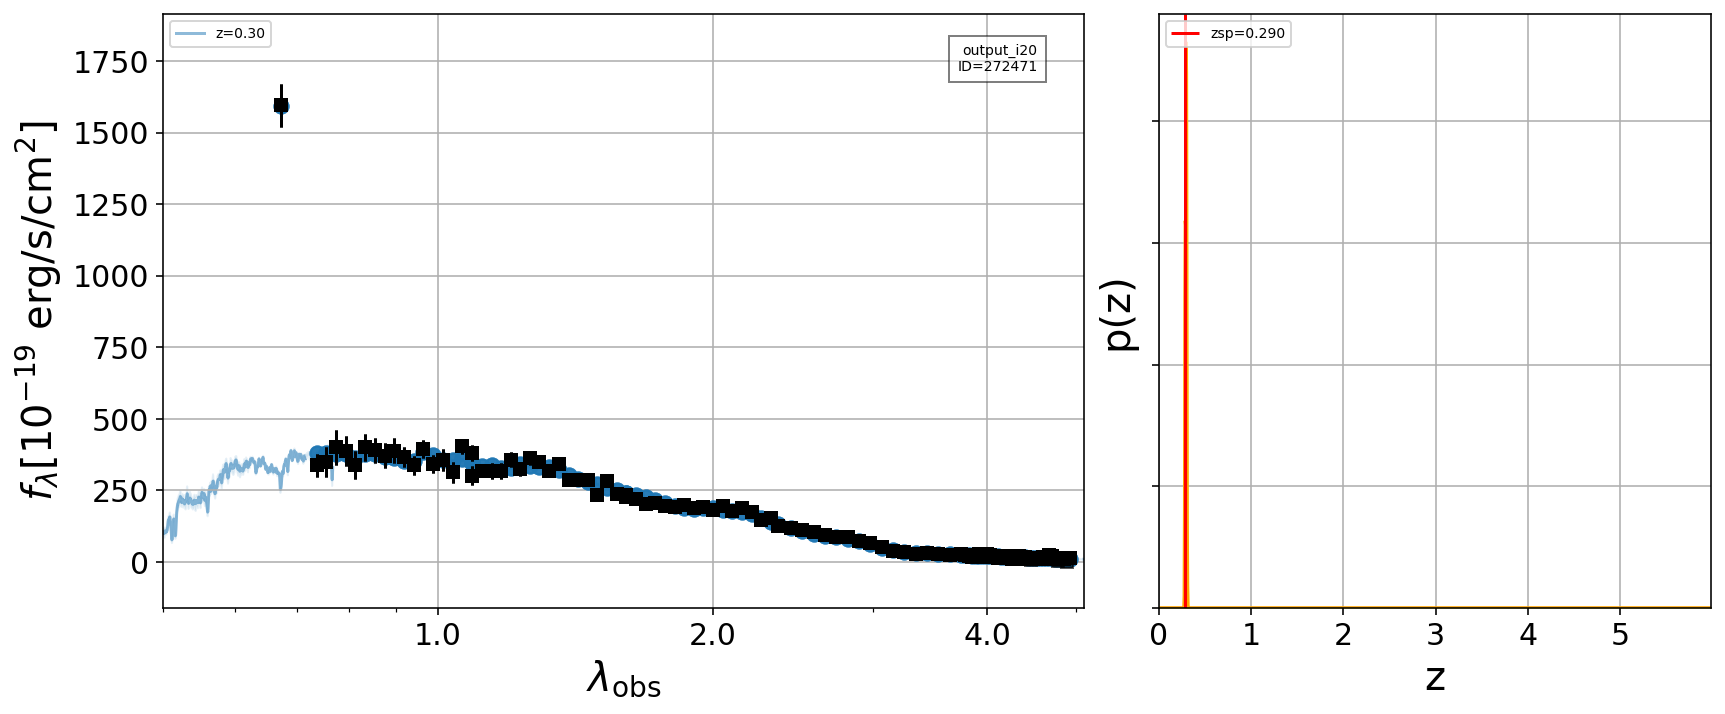

In [33]:
objids = [272471]
for objid in objids:
    fig, data = ez.show_fit(id=objid, xlim=[0.5, 5.1], figsize=(12, 5))
    fig.savefig(dir_outfig/f'fit_{objid}.png', dpi=300)

>>Fitting time: 1.355 s 
>>idx_fit: 51, zbest: 0.29822767, lnpmax: 3.839336
>>Valid Bands:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  

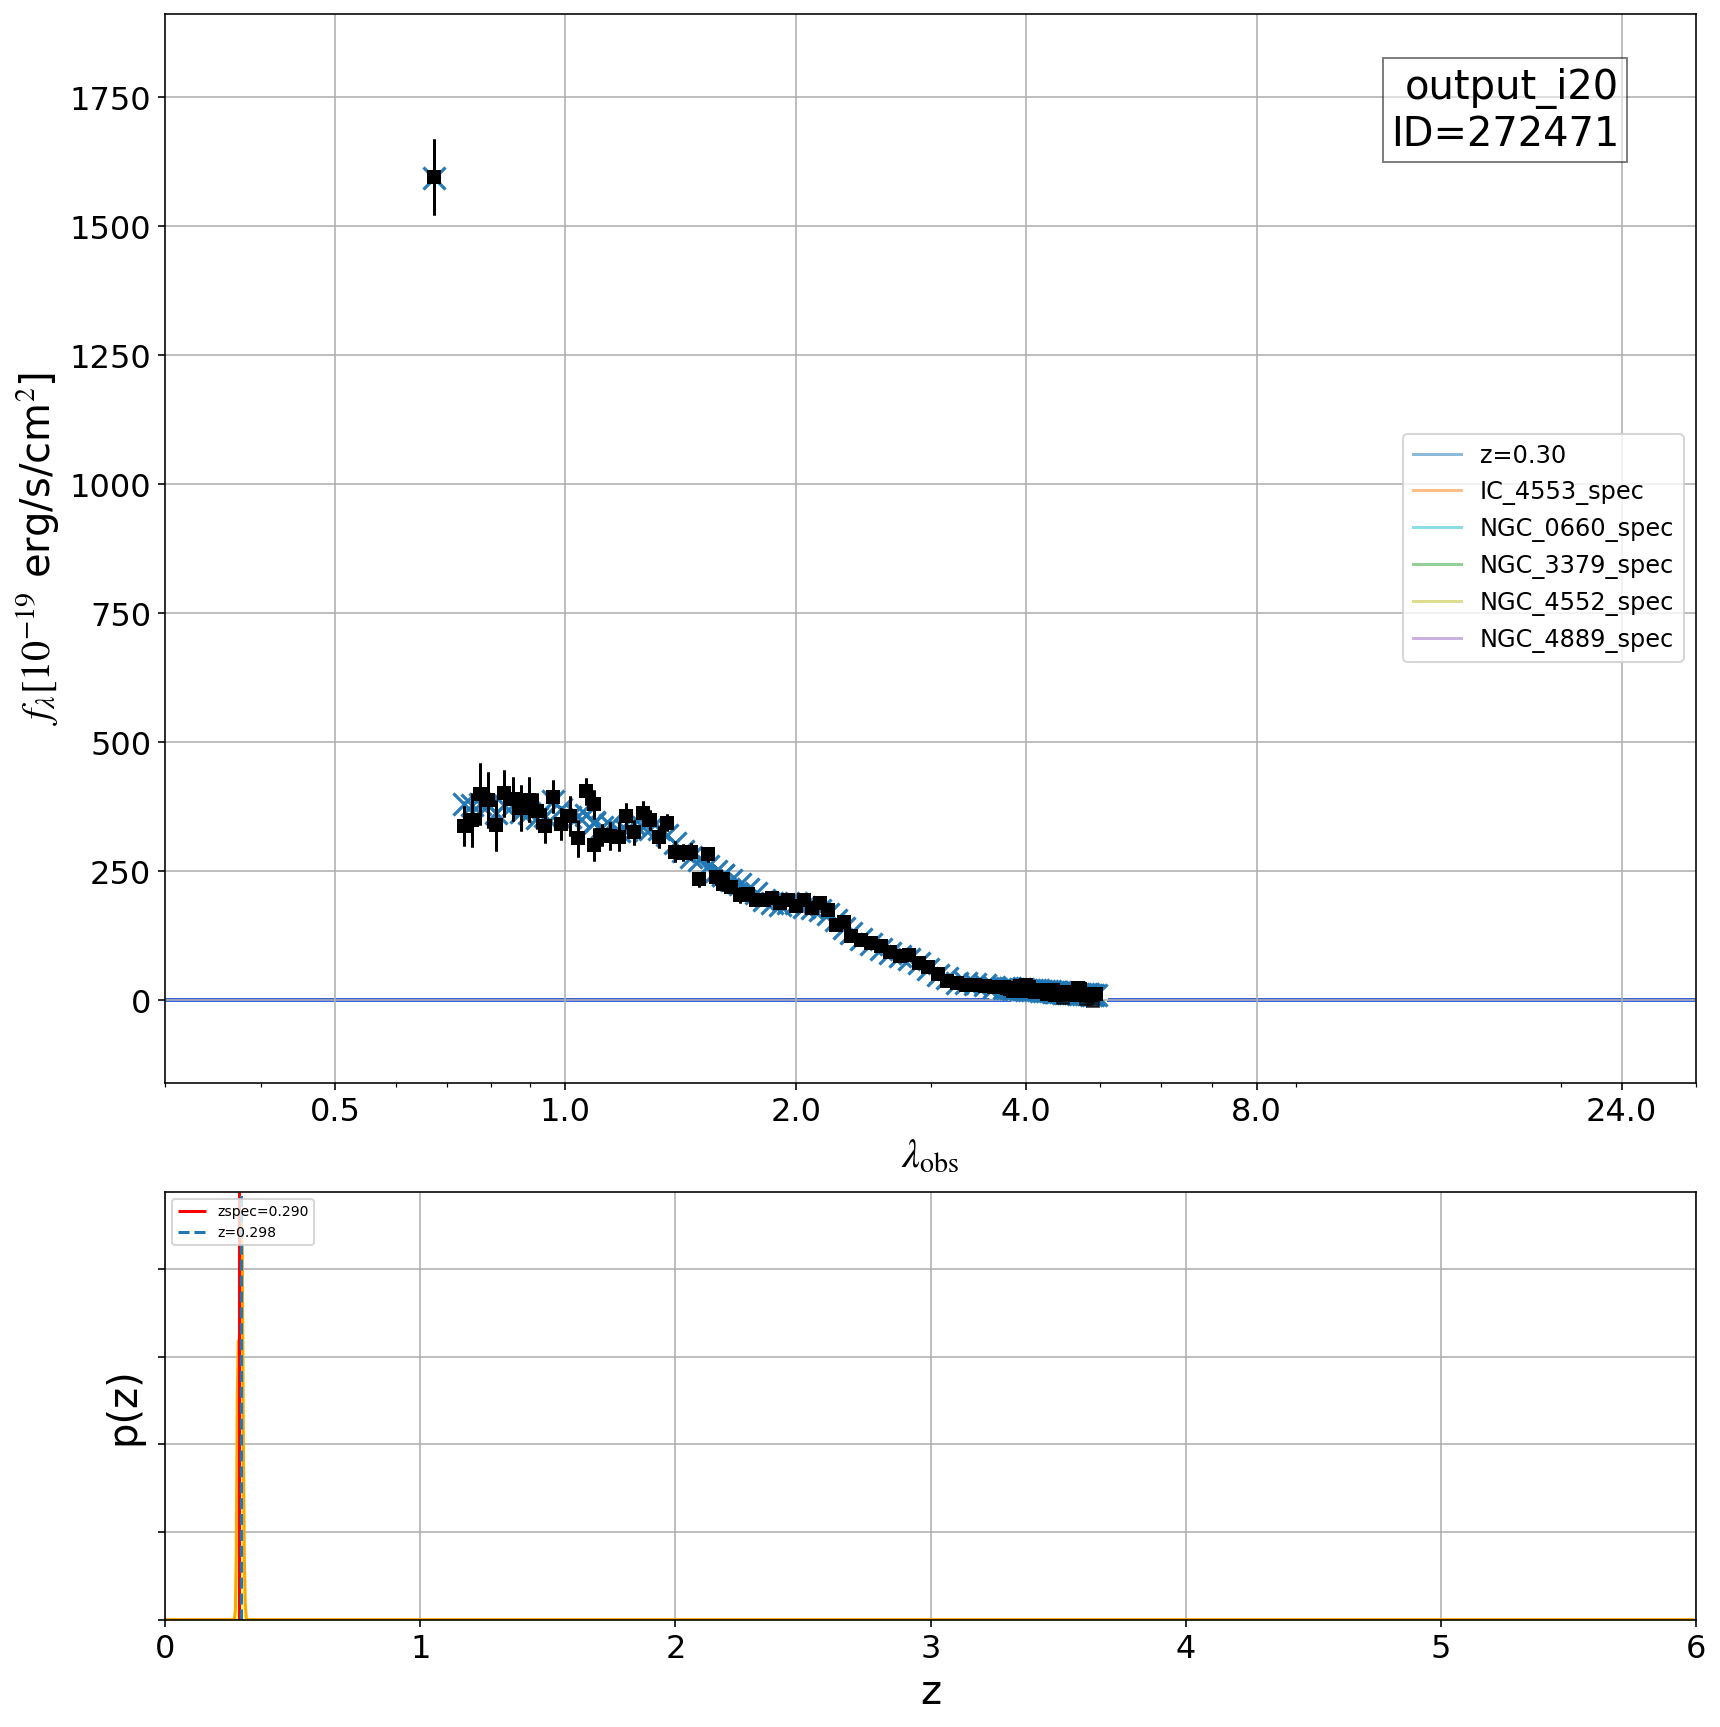

In [36]:
from utils import kasi_wrapper_fit_each_object_show_new
idx = ez.idx[ez.OBJID==272471][0]
dummy = kasi_wrapper_fit_each_object_show_new(idx, ez, outfile='sed-vis.png', verbose=True, get_best_fit=False, prior=False, beta_prior=False, fitter='nnls')

In [38]:
dummy['coeffs'].shape

(160,)

In [40]:
ez.fit_single_templates()

Process template  0


  0%|          | 0/649 [00:00<?, ?it/s]/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:1474: RuntimeWarning: divide by zero encountered in divide
  ampl_j = num/den
/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:1478: RuntimeWarning: invalid value encountered in multiply
  chi = ((mz-self.fnu/self.zp)*self.ok_data)**2/full_err**2
100%|██████████| 649/649 [00:00<00:00, 812.96it/s]


Process template  1


100%|██████████| 649/649 [00:00<00:00, 814.46it/s]


Process template  2


100%|██████████| 649/649 [00:00<00:00, 961.74it/s] 


Process template  3


100%|██████████| 649/649 [00:00<00:00, 1122.10it/s]


Process template  4


100%|██████████| 649/649 [00:00<00:00, 1124.16it/s]


Process template  5


100%|██████████| 649/649 [00:00<00:00, 1117.45it/s]


Process template  6


100%|██████████| 649/649 [00:00<00:00, 925.85it/s] 


Process template  7


100%|██████████| 649/649 [00:00<00:00, 824.25it/s]


Process template  8


100%|██████████| 649/649 [00:00<00:00, 958.38it/s] 


Process template  9


100%|██████████| 649/649 [00:00<00:00, 1138.36it/s]


Process template  10


100%|██████████| 649/649 [00:00<00:00, 1124.32it/s]


Process template  11


100%|██████████| 649/649 [00:00<00:00, 1139.30it/s]


Process template  12


100%|██████████| 649/649 [00:00<00:00, 1127.64it/s]


Process template  13


100%|██████████| 649/649 [00:00<00:00, 1119.96it/s]


Process template  14


100%|██████████| 649/649 [00:00<00:00, 1122.49it/s]


Process template  15


100%|██████████| 649/649 [00:00<00:00, 1120.62it/s]


Process template  16


100%|██████████| 649/649 [00:00<00:00, 1111.25it/s]


Process template  17


100%|██████████| 649/649 [00:00<00:00, 1114.74it/s]


Process template  18


100%|██████████| 649/649 [00:00<00:00, 1117.61it/s]


Process template  19


100%|██████████| 649/649 [00:00<00:00, 1101.25it/s]


Process template  20


100%|██████████| 649/649 [00:00<00:00, 1104.07it/s]


Process template  21


100%|██████████| 649/649 [00:00<00:00, 1092.27it/s]


Process template  22


100%|██████████| 649/649 [00:00<00:00, 1095.43it/s]


Process template  23


100%|██████████| 649/649 [00:00<00:00, 1096.15it/s]


Process template  24


100%|██████████| 649/649 [00:00<00:00, 1095.02it/s]


Process template  25


100%|██████████| 649/649 [00:00<00:00, 1096.67it/s]


Process template  26


100%|██████████| 649/649 [00:00<00:00, 1097.13it/s]


Process template  27


100%|██████████| 649/649 [00:00<00:00, 1097.09it/s]


Process template  28


100%|██████████| 649/649 [00:00<00:00, 1104.94it/s]


Process template  29


100%|██████████| 649/649 [00:00<00:00, 1105.03it/s]


Process template  30


100%|██████████| 649/649 [00:00<00:00, 1102.44it/s]


Process template  31


100%|██████████| 649/649 [00:00<00:00, 1100.13it/s]


Process template  32


100%|██████████| 649/649 [00:00<00:00, 1098.25it/s]


Process template  33


100%|██████████| 649/649 [00:00<00:00, 1063.92it/s]


Process template  34


100%|██████████| 649/649 [00:00<00:00, 812.78it/s]


Process template  35


100%|██████████| 649/649 [00:00<00:00, 812.25it/s]


Process template  36


100%|██████████| 649/649 [00:00<00:00, 814.92it/s]


Process template  37


100%|██████████| 649/649 [00:00<00:00, 812.36it/s]


Process template  38


100%|██████████| 649/649 [00:00<00:00, 813.27it/s]


Process template  39


100%|██████████| 649/649 [00:00<00:00, 816.16it/s]


Process template  40


100%|██████████| 649/649 [00:00<00:00, 815.41it/s]


Process template  41


100%|██████████| 649/649 [00:00<00:00, 812.64it/s]


Process template  42


100%|██████████| 649/649 [00:00<00:00, 809.79it/s]


Process template  43


100%|██████████| 649/649 [00:00<00:00, 809.09it/s]


Process template  44


100%|██████████| 649/649 [00:00<00:00, 809.84it/s]


Process template  45


100%|██████████| 649/649 [00:00<00:00, 976.12it/s] 


Process template  46


100%|██████████| 649/649 [00:00<00:00, 1117.51it/s]


Process template  47


100%|██████████| 649/649 [00:00<00:00, 1121.96it/s]


Process template  48


100%|██████████| 649/649 [00:00<00:00, 1121.16it/s]


Process template  49


100%|██████████| 649/649 [00:00<00:00, 1118.00it/s]


Process template  50


100%|██████████| 649/649 [00:00<00:00, 1089.02it/s]


Process template  51


100%|██████████| 649/649 [00:00<00:00, 1118.52it/s]


Process template  52


100%|██████████| 649/649 [00:00<00:00, 1113.45it/s]


Process template  53


100%|██████████| 649/649 [00:00<00:00, 1032.29it/s]


Process template  54


100%|██████████| 649/649 [00:00<00:00, 1099.40it/s]


Process template  55


100%|██████████| 649/649 [00:00<00:00, 1039.63it/s]


Process template  56


100%|██████████| 649/649 [00:00<00:00, 890.99it/s] 


Process template  57


100%|██████████| 649/649 [00:00<00:00, 807.38it/s]


Process template  58


100%|██████████| 649/649 [00:00<00:00, 810.31it/s]


Process template  59


100%|██████████| 649/649 [00:00<00:00, 811.97it/s]


Process template  60


100%|██████████| 649/649 [00:00<00:00, 812.91it/s]


Process template  61


100%|██████████| 649/649 [00:00<00:00, 798.78it/s]


Process template  62


100%|██████████| 649/649 [00:00<00:00, 802.18it/s]


Process template  63


100%|██████████| 649/649 [00:00<00:00, 798.72it/s]


Process template  64


100%|██████████| 649/649 [00:00<00:00, 800.26it/s]


Process template  65


100%|██████████| 649/649 [00:00<00:00, 804.84it/s]


Process template  66


100%|██████████| 649/649 [00:00<00:00, 802.64it/s]


Process template  67


100%|██████████| 649/649 [00:00<00:00, 799.18it/s]


Process template  68


100%|██████████| 649/649 [00:00<00:00, 799.17it/s]


Process template  69


100%|██████████| 649/649 [00:00<00:00, 800.76it/s]


Process template  70


100%|██████████| 649/649 [00:00<00:00, 801.67it/s]


Process template  71


100%|██████████| 649/649 [00:00<00:00, 801.08it/s]


Process template  72


100%|██████████| 649/649 [00:00<00:00, 798.50it/s]


Process template  73


100%|██████████| 649/649 [00:00<00:00, 801.97it/s]


Process template  74


100%|██████████| 649/649 [00:00<00:00, 797.43it/s]


Process template  75


100%|██████████| 649/649 [00:00<00:00, 810.26it/s]


Process template  76


100%|██████████| 649/649 [00:00<00:00, 800.14it/s]


Process template  77


100%|██████████| 649/649 [00:00<00:00, 798.53it/s]


Process template  78


100%|██████████| 649/649 [00:00<00:00, 798.46it/s]


Process template  79


100%|██████████| 649/649 [00:00<00:00, 799.31it/s]


Process template  80


100%|██████████| 649/649 [00:00<00:00, 794.41it/s]


Process template  81


100%|██████████| 649/649 [00:00<00:00, 798.23it/s]


Process template  82


100%|██████████| 649/649 [00:00<00:00, 800.09it/s]


Process template  83


100%|██████████| 649/649 [00:00<00:00, 814.28it/s]


Process template  84


100%|██████████| 649/649 [00:00<00:00, 798.03it/s]


Process template  85


100%|██████████| 649/649 [00:00<00:00, 802.96it/s]


Process template  86


100%|██████████| 649/649 [00:00<00:00, 796.32it/s]


Process template  87


100%|██████████| 649/649 [00:00<00:00, 796.27it/s]


Process template  88


100%|██████████| 649/649 [00:00<00:00, 803.17it/s]


Process template  89


100%|██████████| 649/649 [00:00<00:00, 798.95it/s]


Process template  90


100%|██████████| 649/649 [00:00<00:00, 798.38it/s]


Process template  91


100%|██████████| 649/649 [00:00<00:00, 810.97it/s]


Process template  92


100%|██████████| 649/649 [00:00<00:00, 801.97it/s]


Process template  93


100%|██████████| 649/649 [00:00<00:00, 802.18it/s]


Process template  94


100%|██████████| 649/649 [00:00<00:00, 803.30it/s]


Process template  95


100%|██████████| 649/649 [00:00<00:00, 801.74it/s]


Process template  96


100%|██████████| 649/649 [00:00<00:00, 801.67it/s]


Process template  97


100%|██████████| 649/649 [00:00<00:00, 801.95it/s]


Process template  98


100%|██████████| 649/649 [00:00<00:00, 800.82it/s]


Process template  99


100%|██████████| 649/649 [00:00<00:00, 797.53it/s]


Process template  100


100%|██████████| 649/649 [00:00<00:00, 802.97it/s]


Process template  101


100%|██████████| 649/649 [00:00<00:00, 803.90it/s]


Process template  102


100%|██████████| 649/649 [00:00<00:00, 805.78it/s]


Process template  103


100%|██████████| 649/649 [00:00<00:00, 799.93it/s]


Process template  104


100%|██████████| 649/649 [00:00<00:00, 799.17it/s]


Process template  105


100%|██████████| 649/649 [00:00<00:00, 800.75it/s]


Process template  106


100%|██████████| 649/649 [00:00<00:00, 804.90it/s]


Process template  107


100%|██████████| 649/649 [00:00<00:00, 804.41it/s]


Process template  108


100%|██████████| 649/649 [00:00<00:00, 806.13it/s]


Process template  109


100%|██████████| 649/649 [00:00<00:00, 803.61it/s]


Process template  110


100%|██████████| 649/649 [00:00<00:00, 803.87it/s]


Process template  111


100%|██████████| 649/649 [00:00<00:00, 804.02it/s]


Process template  112


100%|██████████| 649/649 [00:00<00:00, 799.65it/s]


Process template  113


100%|██████████| 649/649 [00:00<00:00, 802.00it/s]


Process template  114


100%|██████████| 649/649 [00:00<00:00, 805.61it/s]


Process template  115


100%|██████████| 649/649 [00:00<00:00, 803.99it/s]


Process template  116


100%|██████████| 649/649 [00:00<00:00, 803.12it/s]


Process template  117


100%|██████████| 649/649 [00:00<00:00, 803.22it/s]


Process template  118


100%|██████████| 649/649 [00:00<00:00, 802.73it/s]


Process template  119


100%|██████████| 649/649 [00:00<00:00, 799.85it/s]


Process template  120


100%|██████████| 649/649 [00:00<00:00, 819.08it/s]


Process template  121


100%|██████████| 649/649 [00:00<00:00, 814.76it/s]


Process template  122


100%|██████████| 649/649 [00:00<00:00, 821.18it/s]


Process template  123


100%|██████████| 649/649 [00:00<00:00, 819.94it/s]


Process template  124


100%|██████████| 649/649 [00:00<00:00, 820.07it/s]


Process template  125


100%|██████████| 649/649 [00:00<00:00, 821.47it/s]


Process template  126


100%|██████████| 649/649 [00:00<00:00, 822.12it/s]


Process template  127


100%|██████████| 649/649 [00:00<00:00, 822.09it/s]


Process template  128


100%|██████████| 649/649 [00:00<00:00, 821.16it/s]


Process template  129


100%|██████████| 649/649 [00:00<00:00, 819.77it/s]


Process template  130


100%|██████████| 649/649 [00:00<00:00, 814.66it/s]


Process template  131


100%|██████████| 649/649 [00:00<00:00, 817.93it/s]


Process template  132


100%|██████████| 649/649 [00:00<00:00, 821.34it/s]


Process template  133


100%|██████████| 649/649 [00:00<00:00, 823.67it/s]


Process template  134


100%|██████████| 649/649 [00:00<00:00, 817.77it/s]


Process template  135


100%|██████████| 649/649 [00:00<00:00, 817.50it/s]


Process template  136


100%|██████████| 649/649 [00:00<00:00, 820.95it/s]


Process template  137


100%|██████████| 649/649 [00:00<00:00, 822.13it/s]


Process template  138


100%|██████████| 649/649 [00:00<00:00, 821.46it/s]


Process template  139


100%|██████████| 649/649 [00:00<00:00, 819.46it/s]


Process template  140


100%|██████████| 649/649 [00:00<00:00, 817.67it/s]


Process template  141


100%|██████████| 649/649 [00:00<00:00, 819.66it/s]


Process template  142


100%|██████████| 649/649 [00:00<00:00, 817.03it/s]


Process template  143


100%|██████████| 649/649 [00:00<00:00, 819.91it/s]


Process template  144


100%|██████████| 649/649 [00:00<00:00, 803.66it/s]


Process template  145


100%|██████████| 649/649 [00:00<00:00, 805.32it/s]


Process template  146


100%|██████████| 649/649 [00:00<00:00, 805.77it/s]


Process template  147


100%|██████████| 649/649 [00:00<00:00, 803.65it/s]


Process template  148


100%|██████████| 649/649 [00:00<00:00, 804.25it/s]


Process template  149


100%|██████████| 649/649 [00:00<00:00, 803.18it/s]


Process template  150


100%|██████████| 649/649 [00:00<00:00, 802.80it/s]


Process template  151


100%|██████████| 649/649 [00:00<00:00, 804.89it/s]


Process template  152


100%|██████████| 649/649 [00:00<00:00, 805.60it/s]


Process template  153


100%|██████████| 649/649 [00:00<00:00, 800.15it/s]


Process template  154


100%|██████████| 649/649 [00:00<00:00, 803.12it/s]


Process template  155


100%|██████████| 649/649 [00:00<00:00, 798.84it/s]


Process template  156


100%|██████████| 649/649 [00:00<00:00, 803.36it/s]


Process template  157


100%|██████████| 649/649 [00:00<00:00, 805.29it/s]


Process template  158


100%|██████████| 649/649 [00:00<00:00, 803.02it/s]


Process template  159


100%|██████████| 649/649 [00:00<00:00, 804.03it/s]


Compute p(z|T)


(array([[[inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         ...,
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf]],
 
        [[inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         ...,
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf]],
 
        [[inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         ...,
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf]],
 
        ...,
 
        [[inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         [inf,

In [43]:
data['coeffs']

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.25767568e+24, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.21120106e+24,
      

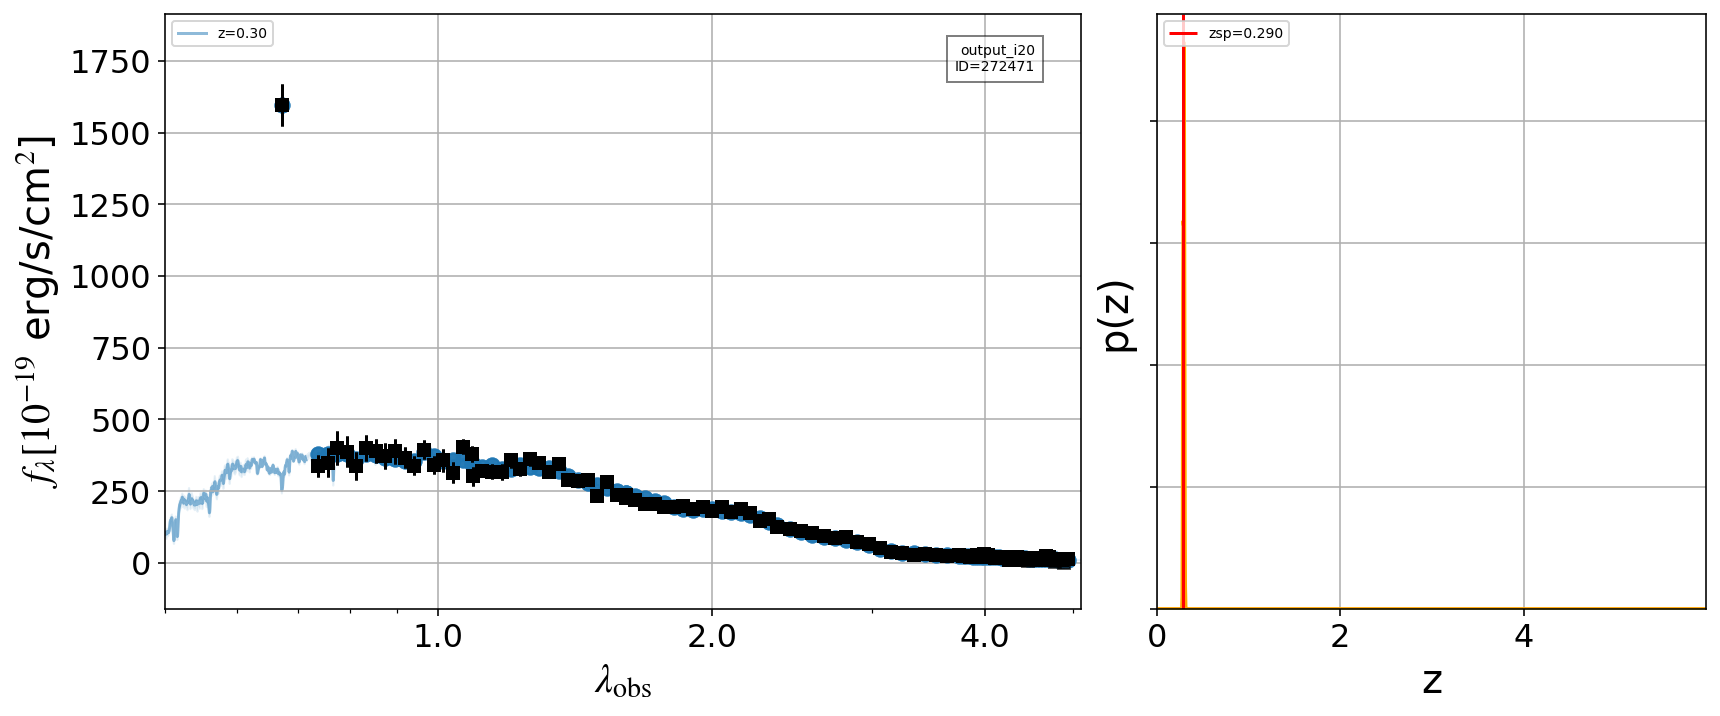

In [41]:
fig, data = ez.show_fit(id=272471, xlim=[0.5, 5.1], figsize=(12, 5))

In [17]:
imag = 25
params['CATALOG_FILE']      = f"data/synphot_i{imag:02d}.dat" 

dir_output = WD/f"output_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['TEMPLATE_COMBOS']   = 1

with open('tempfilt.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx[:50], n_proc=1)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i25.dat
   >>> NOBJ = 17036
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F

Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  ../prior_K_TAO.dat


649it [00:18, 35.62it/s]
100%|██████████| 649/649 [00:42<00:00, 15.19it/s]


Compute best fits
fit_best: 0.2 s (n_proc=1,  NOBJ=50)
Fit 43.9 s (n_proc=1, NOBJ=50)


In [ ]:
objids = ez.OBJID[:50]
for objid in objids:
    fig, data = ez.show_fit(id=objid, xlim=[0.5, 5.1], figsize=(12, 5))
    fig.savefig(dir_outfig/f'fit_{objid}.png', dpi=300)

In [23]:
2.42/(1+2.7)

0.654054054054054

In [25]:
3.82/(1+4.8)

0.6586206896551724

In [26]:
2.42/(1+3.8)

0.5041666666666667

These are the wavelength where the SPHEREx spectral resolution changes - and the redshifts that show discrete horizontal line (i.e. photo-z peaks) correspond to the H alpha or OIII line hitting those wavelengths.

In [35]:
imag = 19
params['CATALOG_FILE']      = f"data/synphot_i{imag:02d}.dat" 

dir_output = WD/f"output_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['TEMPLATE_COMBOS']   = 1
params['Z_STEP']            = 0.001

with open('tempfilt0001.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default


Read CATALOG_FILE: data/synphot_i19.dat
   >>> NOBJ = 73
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F444 E444 (444): SPHEREx_Band2_9
F445 E445 (445): SPHEREx_Band2_10
F446 E446 (446): SPHEREx_Band2_11
F447 E447

Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  ../prior_K_TAO.dat


1946it [00:00, 7234.85it/s]
100%|██████████| 1946/1946 [03:14<00:00,  9.98it/s]


Compute best fits
fit_best: 0.3 s (n_proc=1,  NOBJ=73)
Fit 197.9 s (n_proc=1, NOBJ=73)


Objects : 73
Outliers: 0




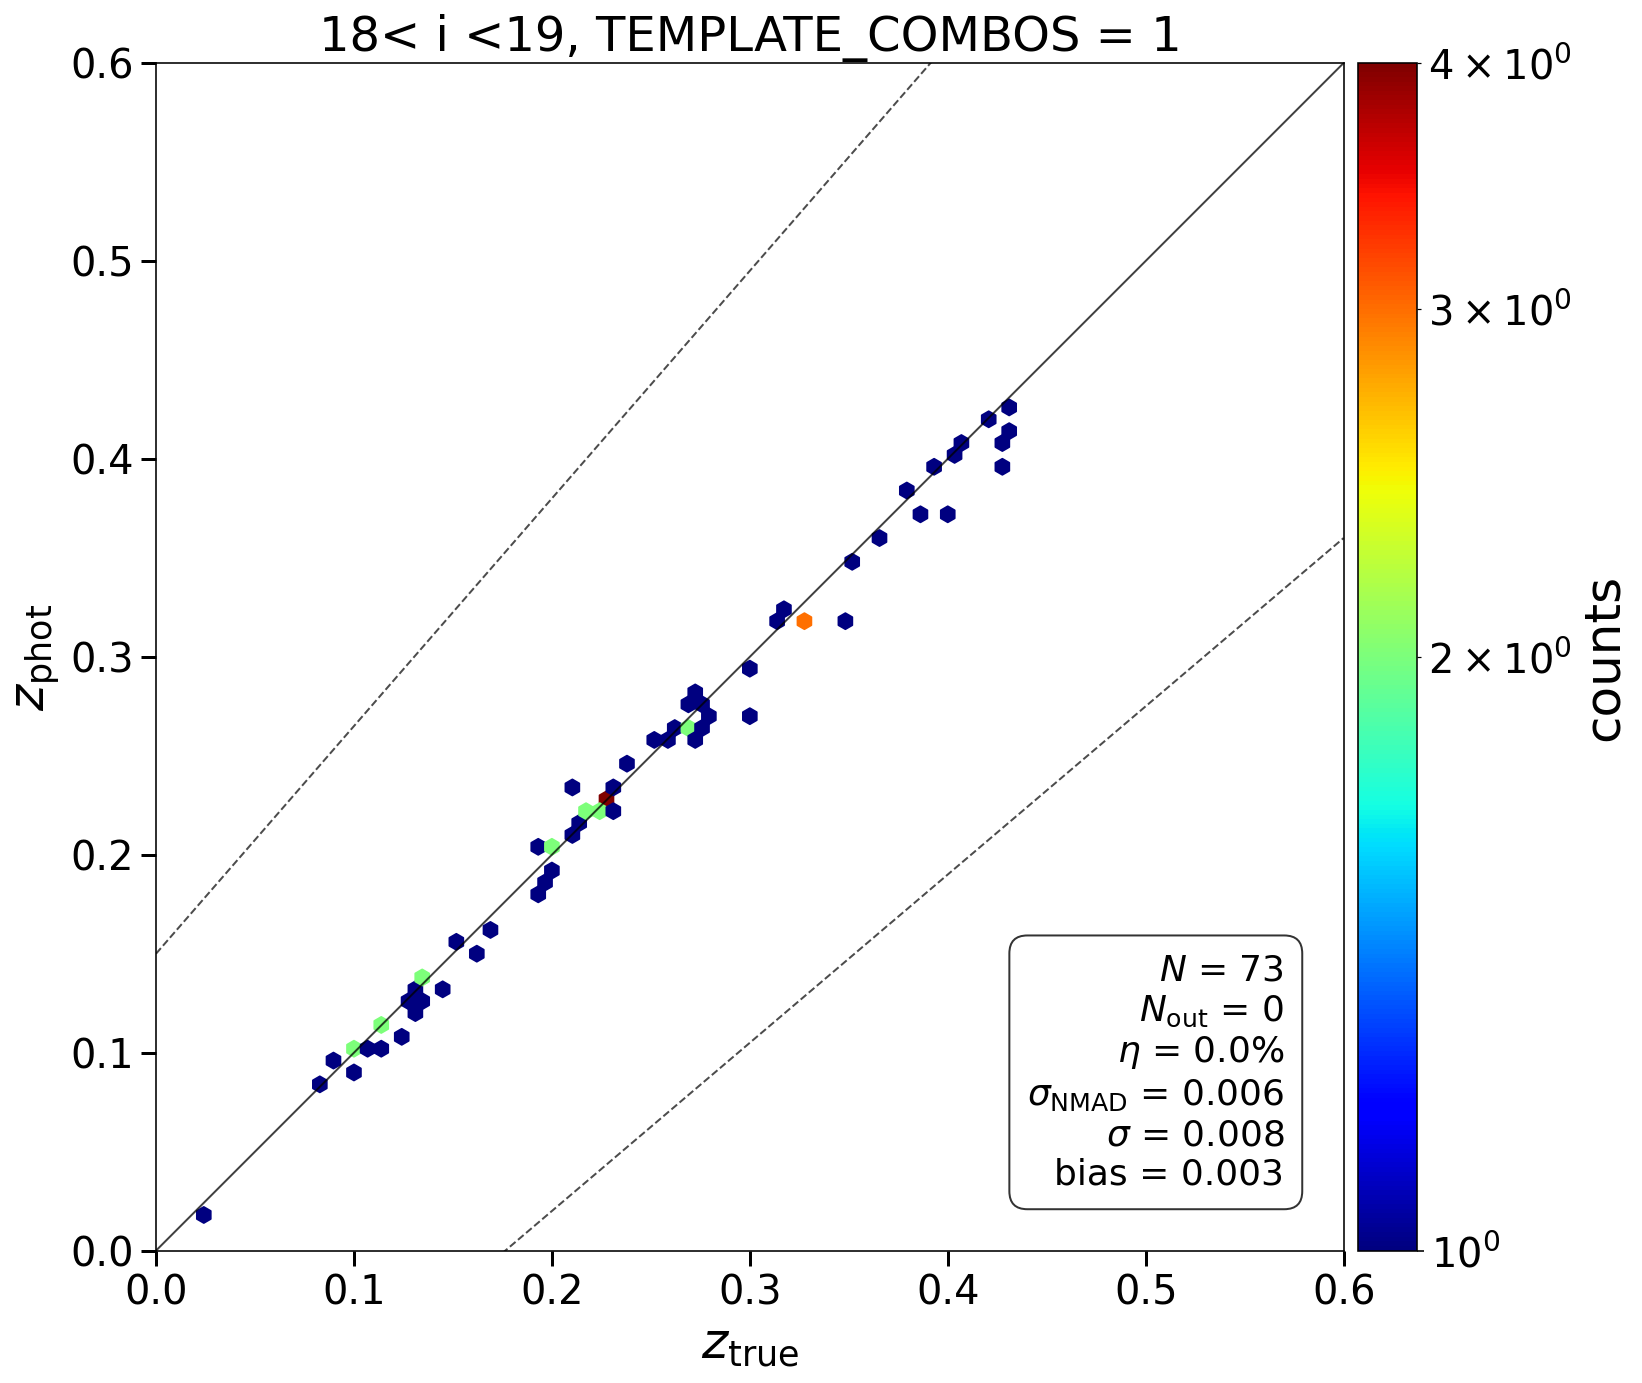

In [36]:
cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d}, TEMPLATE_COMBOS = 1",
                          xmin=0, xmax=0.6, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}.fits', overwrite=True)

In [37]:
imag = 20
params['CATALOG_FILE']      = f"data/synphot_i{imag:02d}.dat" 

dir_output = WD/f"output_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['TEMPLATE_COMBOS']   = 1
params['Z_STEP']            = 0.001

with open('tempfilt0001.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i20.dat
   >>> NOBJ = 228
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F44

Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  ../prior_K_TAO.dat


1946it [00:00, 3185.14it/s]
100%|██████████| 1946/1946 [09:58<00:00,  3.25it/s]


Compute best fits
fit_best: 0.9 s (n_proc=1,  NOBJ=228)
Fit 601.5 s (n_proc=1, NOBJ=228)


Objects : 228
Outliers: 0




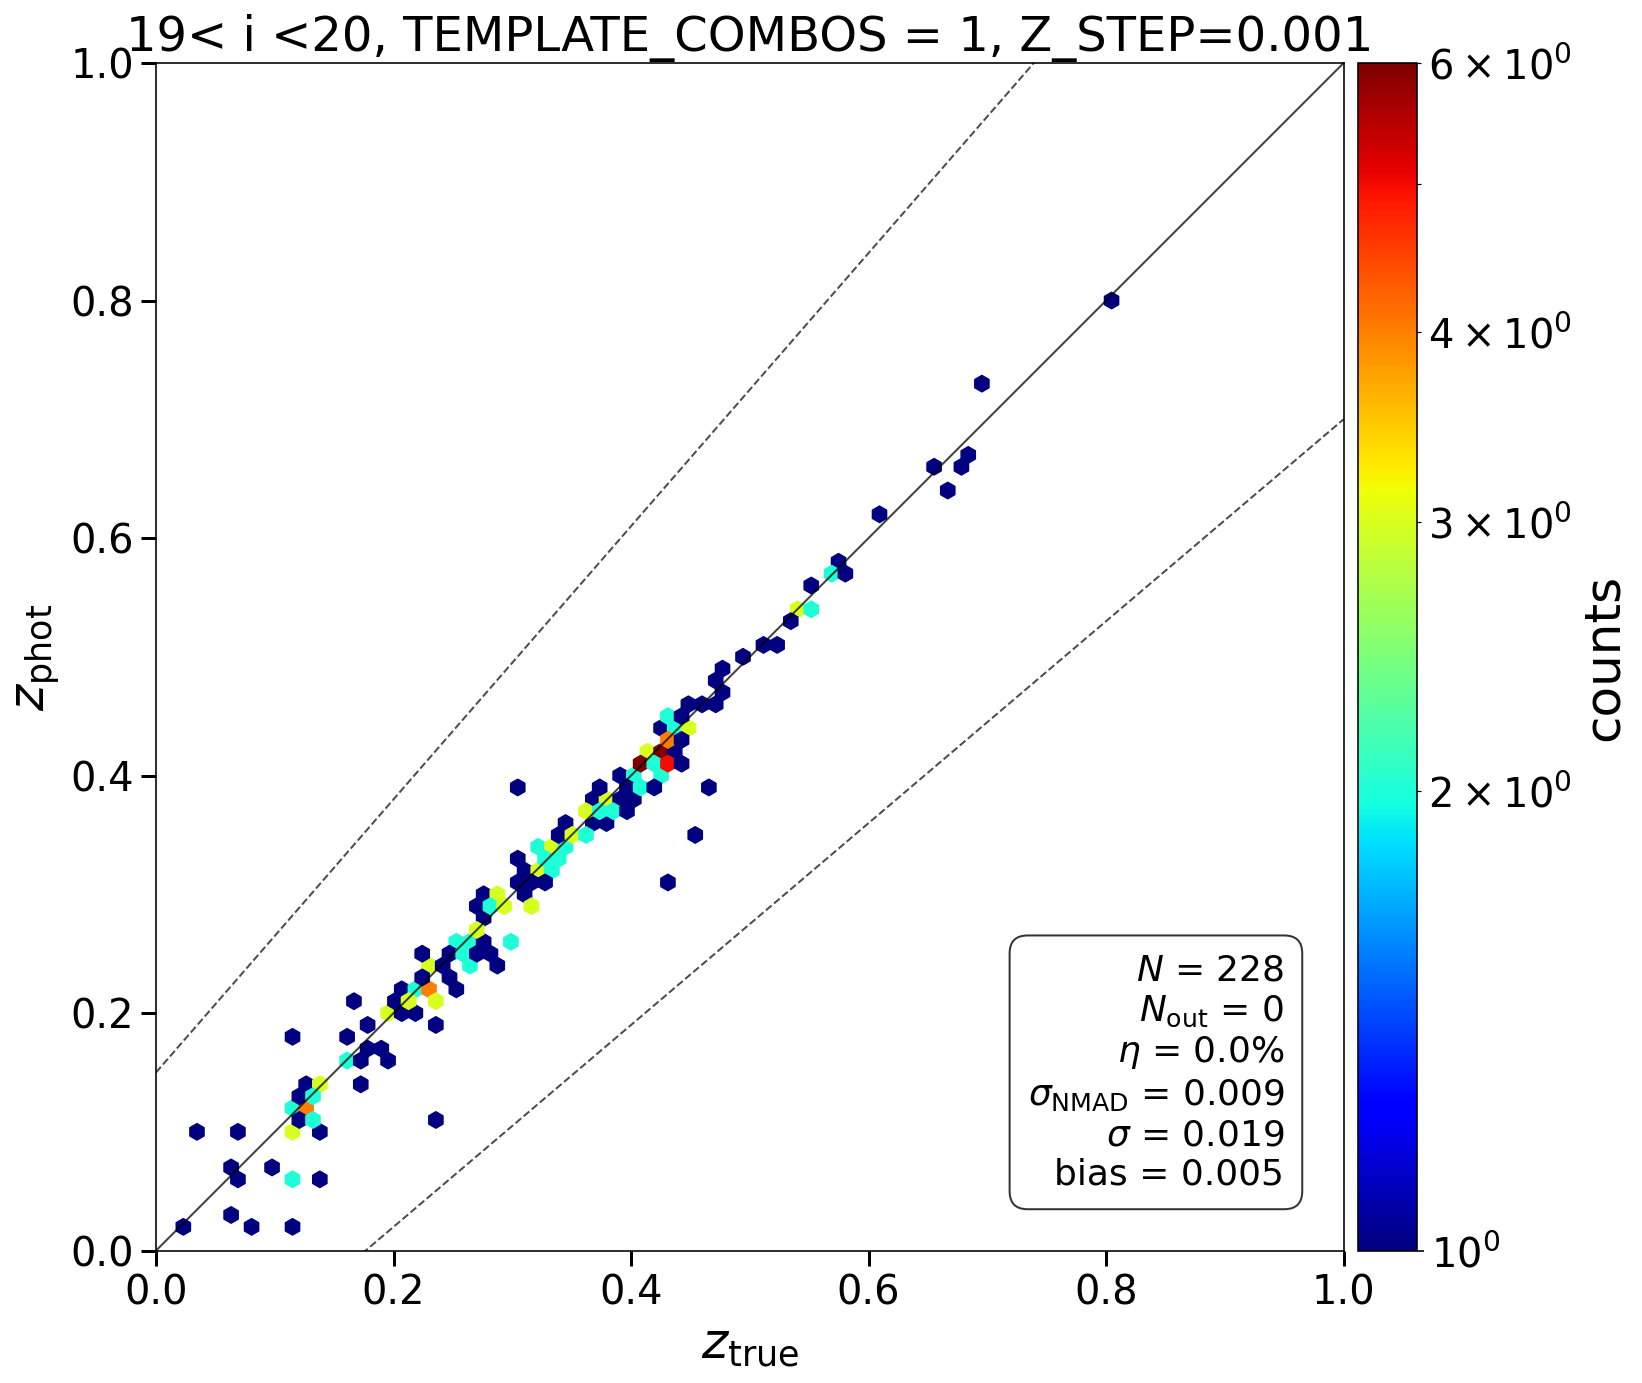

In [39]:
cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d}, TEMPLATE_COMBOS = 1, Z_STEP=0.001",
                          xmin=0, xmax=1.0, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/'simple_output_i{imag:02d}.fits', overwrite=True)

In [40]:
imag = 22
params['CATALOG_FILE']      = f"data/synphot_i{imag:02d}.dat" 

dir_output = WD/f"output_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['TEMPLATE_COMBOS']   = 1
params['Z_STEP']            = 0.001

with open('tempfilt0001.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i22.dat
   >>> NOBJ = 1856
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F4

Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  ../prior_K_TAO.dat


1946it [00:04, 471.15it/s]
100%|██████████| 1946/1946 [1:26:15<00:00,  2.66s/it]


Compute best fits
fit_best: 5.2 s (n_proc=1,  NOBJ=1856)
Fit 5182.7 s (n_proc=1, NOBJ=1856)


Objects : 1856
Outliers: 449




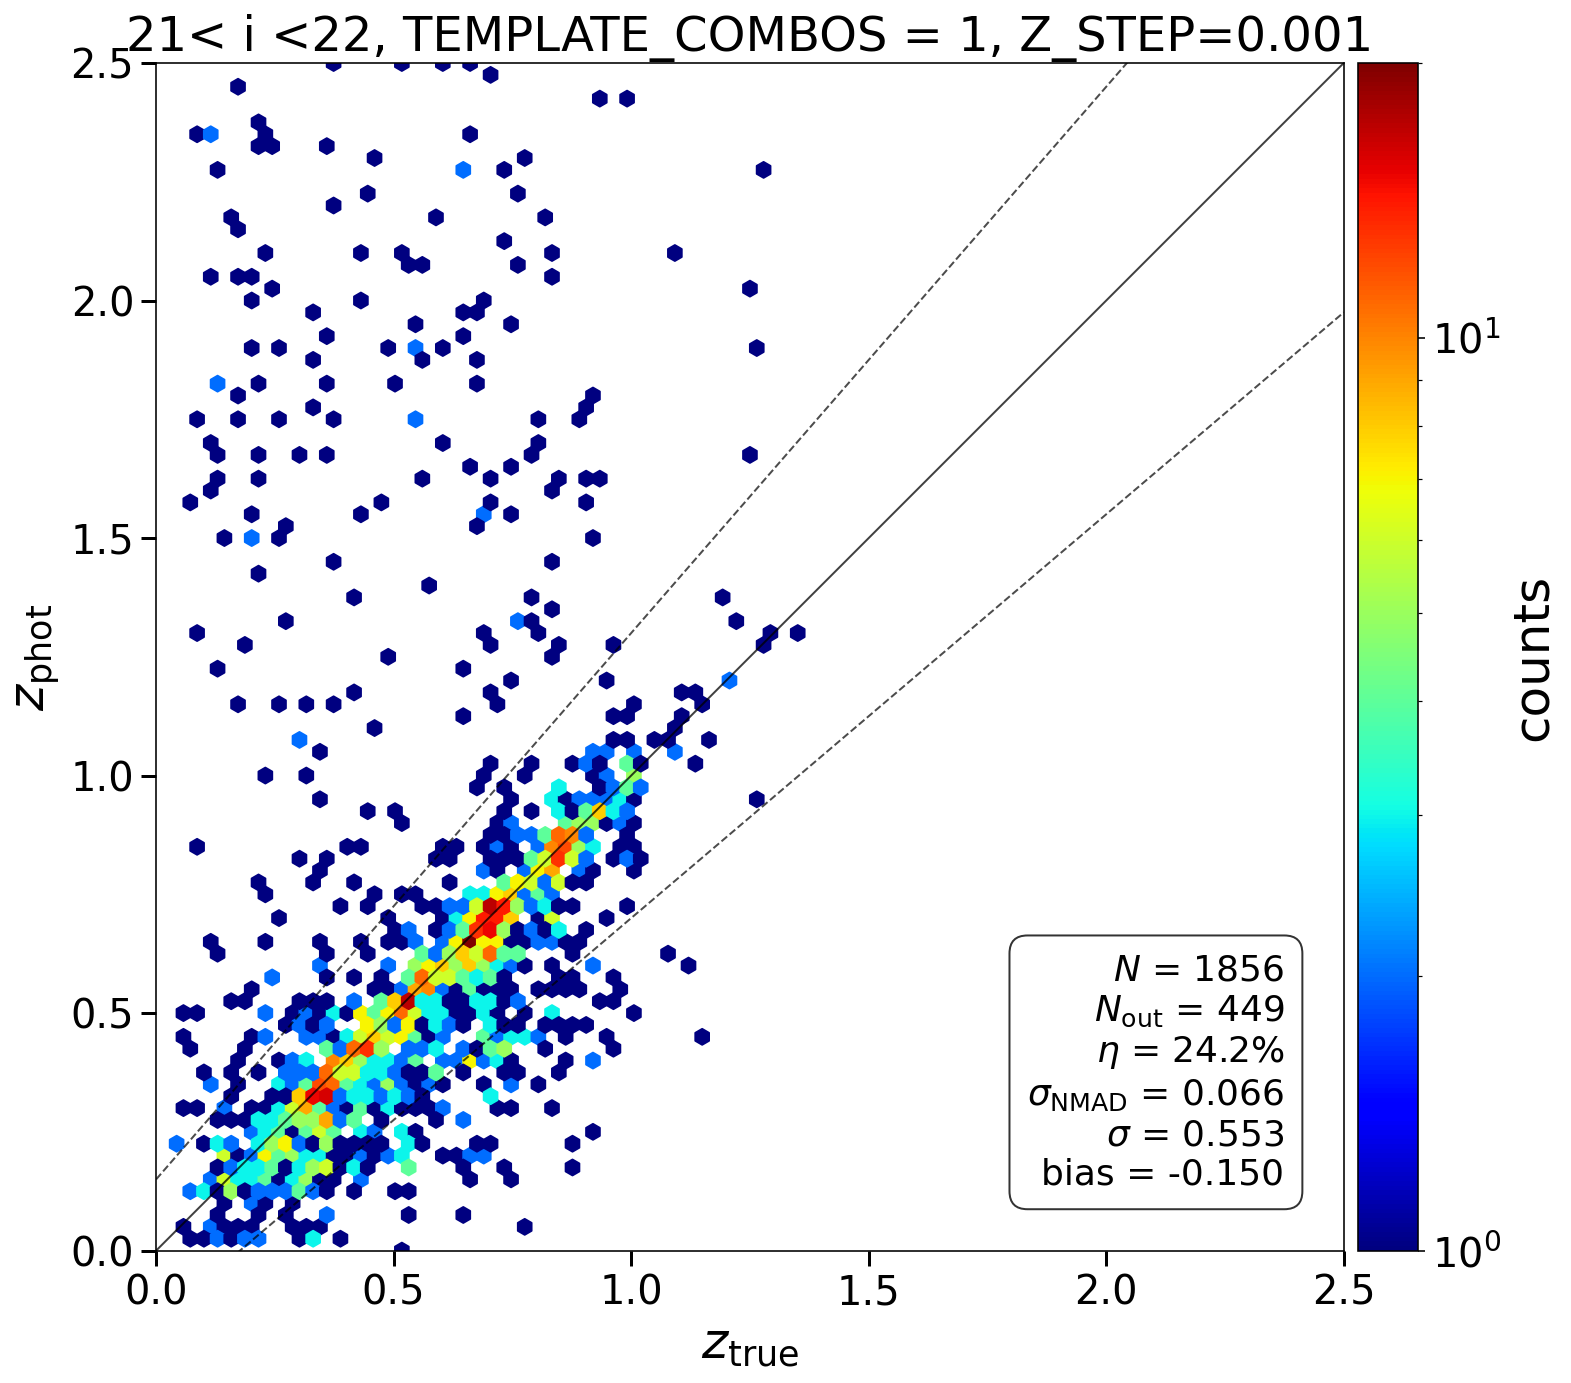

In [42]:
cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d}, TEMPLATE_COMBOS = 1, Z_STEP=0.001",
                          xmin=0, xmax=2.5, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}.fits', overwrite=True)

# Examining outliers for bright targets

In [5]:
os.environ["MKL_NUM_THREADS"] = "30"
os.environ["NUMEXPR_NUM_THREADS"] = "30" 
os.environ["OMP_NUM_THREADS"] = "30" 
os.environ["OPENBLAS_NUM_THREADS"] = "30"
import numpy as np

imag = 21
params['CATALOG_FILE']      = f"data/synphot_i{imag:02d}.dat" 

dir_output = WD/f"output_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['TEMPLATE_COMBOS']   = 1
params['Z_STEP']            = 0.003

with open('tempfilt.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i21.dat
   >>> NOBJ = 662
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F44

Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  ../prior_K_TAO.dat


649it [00:00, 885.52it/s]
100%|██████████| 649/649 [12:22<00:00,  1.14s/it]


Compute best fits
fit_best: 3.1 s (n_proc=1,  NOBJ=660)
Fit 746.4 s (n_proc=1, NOBJ=662)


In [ ]:
delta_z = ez.ZSPEC - ez.zbest
dz = delta_z/(1+ez.ZSPEC)
outliers = np.abs(dz)>0.15

objids = ez.OBJID[outliers]
for objid in objids:
    fig, data = ez.show_fit(id=objid, xlim=[0.5, 5.1], figsize=(12, 5))
    fig.savefig(dir_outfig/f'outliers_{objid}.png', dpi=300)

In [ ]:
objids = ez.OBJID[~outliers][:5]
for objid in objids:
    fig, data = ez.show_fit(id=objid, xlim=[0.5, 5.1], figsize=(12, 5))
    fig.savefig(dir_outfig/f'non-outliers_{objid}.png', dpi=300)

In [19]:
# failed to fit
ez.fit_catalog(id=[512165], n_proc=1)
ez.zbest[ez.OBJID == 512165]

  1%|          | 4/649 [00:05<14:40,  1.36s/it]

100%|██████████| 649/649 [11:57<00:00,  1.11s/it]


Compute best fits
fit_best: 2.0 s (n_proc=1,  NOBJ=660)
Fit 720.7 s (n_proc=1, NOBJ=662)


array([-1.], dtype=float32)

In [22]:
(ez.chi2_fit[ez.OBJID == 512165] != 0).sum()

649

In [16]:
ez.NOBJ

662

In [118]:
imag = 19
params['CATALOG_FILE']      = f"data/synphot_i{imag:02d}.dat" 

dir_output = WD/f"output_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"


params['TEMP_ERR_A2']       = 0.0

params['Z_STEP']            = 0.001

params['APPLY_PRIOR']       = True
params['PRIOR_FILE']        = "../prior_K_TAO.dat"
params['PRIOR_FILTER']      = 466  # 2MASS Ks band
params['PRIOR_ABZP']        = 23.9
params['PRIOR_FLOOR']       = 0.01

translate_filename = 'dummy.translate'

with open('tempfilt0001.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i19.dat
   >>> NOBJ = 73
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F444

1946it [00:00, 12403.36it/s]
  1%|          | 15/1946 [00:00<01:31, 21.13it/s]


ValueError: operands could not be broadcast together with shapes (160,204) (102,) 

In [117]:
ez.NFILT

102

In [94]:
ez.fnu[:,:102]

array([[ 90.27, 116.38, 105.37, ..., 126.34,  90.36, 121.63],
       [ 89.82, 110.2 , 119.11, ...,  36.92,  90.38, 182.83],
       [103.69, 136.52, 151.22, ..., 178.7 , 152.53, 216.87],
       ...,
       [115.25, 121.35, 128.87, ..., 100.85, 114.3 , 118.58],
       [115.14, 126.64, 114.7 , ...,  30.48,  63.91, 102.52],
       [164.59, 179.85, 176.58, ..., 162.84,  81.46, 199.24]],
      dtype=float32)

In [95]:
ez.fnu[:,102:]

array([[ 90.27, 116.38, 105.37, ..., 126.34,  90.36, 121.63],
       [ 89.82, 110.2 , 119.11, ...,  36.92,  90.38, 182.83],
       [103.69, 136.52, 151.22, ..., 178.7 , 152.53, 216.87],
       ...,
       [115.25, 121.35, 128.87, ..., 100.85, 114.3 , 118.58],
       [115.14, 126.64, 114.7 , ...,  30.48,  63.91, 102.52],
       [164.59, 179.85, 176.58, ..., 162.84,  81.46, 199.24]],
      dtype=float32)

In [72]:
ez.flux_columns.index("466")

ValueError: '466' is not in list

In [76]:
ez.f_numbers.shape

(204,)

In [77]:
ez.NFILT

204

In [73]:
ix = ez.f_numbers == 465
prior_mag_cat = ez.param['PRIOR_ABZP'] 
prior_mag_cat += -2.5*np.log10(np.squeeze(ez.fnu[:,ix]))
prior_mag_cat

array([[17.6535  , 17.6535  ],
       [17.815975, 17.815975],
       [17.212044, 17.212044],
       [18.42775 , 18.42775 ],
       [17.530132, 17.530132],
       [17.611738, 17.611738],
       [17.564426, 17.564426],
       [17.04714 , 17.04714 ],
       [17.776535, 17.776535],
       [17.460241, 17.460241],
       [18.397667, 18.397667],
       [17.794899, 17.794899],
       [18.72694 , 18.72694 ],
       [17.913301, 17.913301],
       [17.623201, 17.623201],
       [17.372898, 17.372898],
       [17.922264, 17.922264],
       [17.333687, 17.333687],
       [17.361992, 17.361992],
       [17.079683, 17.079683],
       [18.416979, 18.416979],
       [17.997429, 17.997429],
       [17.657053, 17.657053],
       [18.241796, 18.241796],
       [17.90502 , 17.90502 ],
       [17.398628, 17.398628],
       [17.687258, 17.687258],
       [18.054855, 18.054855],
       [17.727581, 17.727581],
       [17.496143, 17.496143],
       [18.550222, 18.550222],
       [18.126669, 18.126669],
       [

In [96]:
ez.tempfilt.tempfilt.shape

(1903, 160, 204)

In [98]:
self = ez

ampl = np.zeros((self.NTEMP, self.NOBJ, self.NZ), 
                dtype=self.ARRAY_DTYPE)
chi2 = np.zeros((self.NTEMP, self.NOBJ, self.NZ),
                dtype=self.ARRAY_DTYPE)

chiz = np.zeros((self.NZ, self.NOBJ),
                dtype=self.ARRAY_DTYPE)
amplz = np.zeros((self.NZ, self.NOBJ),
                    dtype=self.ARRAY_DTYPE)
        
# for i in range(self.NTEMP):
#     print('Process template ', i)
i=7
templ_i = self.tempfilt.tempfilt[:,i,:].T
j=10
# for j in tqdm(range(self.NZ)):
        #print(j)
tefz = self.TEF(self.zgrid[j])
full_err = np.sqrt(self.efnu**2+(self.fnu*tefz)**2)
templ_iz = templ_i[:,j]
num = (self.fnu/self.zp/full_err*self.ok_data).dot(templ_iz)
den = (1./full_err*self.ok_data).dot(templ_iz**2)
ampl_j = num/den
amplz[j,:] = ampl_j

mz = ampl_j[:,None]*templ_iz[None,:]
chi = ((mz-self.fnu/self.zp)*self.ok_data)**2/full_err**2
chiz[j,:] = chi.sum(axis=1)

#     chi2[i,:,:] = chiz.T
#     ampl[i,:,:] = amplz.T
    
# chimin = chi2.min(axis=2).min(axis=0)
# if verbose:
#     print('Compute p(z|T)')
    
# logpz = -(chi2 - chimin[None,:,None])/2

# pzt = np.exp(logpz).sum(axis=0)
# pznorm = np.trapz(pzt, self.zgrid, axis=1)
# logpz -= np.log(pznorm[None,:,None])

In [109]:
tempfilt.tempfilt[:,0,:]

array([[6.9461061e-25, 7.6826547e-25, 7.7016929e-25, ..., 5.6035221e-25,
        5.5826222e-25, 5.5619624e-25],
       [6.9059122e-25, 7.6573569e-25, 7.7169150e-25, ..., 5.6020459e-25,
        5.5848419e-25, 5.5644961e-25],
       [6.8644581e-25, 7.6307625e-25, 7.7326680e-25, ..., 5.6001596e-25,
        5.5877597e-25, 5.5675342e-25],
       ...,
       [4.2348070e-28, 3.4512320e-28, 2.8941510e-28, ..., 6.7582887e-25,
        7.0598836e-25, 7.3733991e-25],
       [4.2080818e-28, 3.4551662e-28, 2.8736216e-28, ..., 6.6815380e-25,
        7.0393456e-25, 7.3359706e-25],
       [4.1822522e-28, 3.4629667e-28, 2.8499054e-28, ..., 6.6069295e-25,
        7.0204134e-25, 7.2905450e-25]], dtype=float32)

In [112]:
ez.cat.colnames

['id',
 'F419',
 'E419',
 'F420',
 'E420',
 'F421',
 'E421',
 'F422',
 'E422',
 'F423',
 'E423',
 'F424',
 'E424',
 'F425',
 'E425',
 'F426',
 'E426',
 'F427',
 'E427',
 'F428',
 'E428',
 'F429',
 'E429',
 'F430',
 'E430',
 'F431',
 'E431',
 'F432',
 'E432',
 'F433',
 'E433',
 'F434',
 'E434',
 'F435',
 'E435',
 'F436',
 'E436',
 'F437',
 'E437',
 'F438',
 'E438',
 'F439',
 'E439',
 'F440',
 'E440',
 'F441',
 'E441',
 'F442',
 'E442',
 'F443',
 'E443',
 'F444',
 'E444',
 'F445',
 'E445',
 'F446',
 'E446',
 'F447',
 'E447',
 'F448',
 'E448',
 'F449',
 'E449',
 'F450',
 'E450',
 'F451',
 'E451',
 'F452',
 'E452',
 'F453',
 'E453',
 'F454',
 'E454',
 'F455',
 'E455',
 'F456',
 'E456',
 'F457',
 'E457',
 'F458',
 'E458',
 'F459',
 'E459',
 'F460',
 'E460',
 'F461',
 'E461',
 'F462',
 'E462',
 'F463',
 'E463',
 'F464',
 'E464',
 'F465',
 'E465',
 'F466',
 'E466',
 'F467',
 'E467',
 'F468',
 'E468',
 'F469',
 'E469',
 'F470',
 'E470',
 'F471',
 'E471',
 'F472',
 'E472',
 'F473',
 'E473',
 'F